# Import Statements

In [ ]:
!pip install category_encoders # for TargetEncoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt 

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, log_loss, make_scorer

from category_encoders import TargetEncoder

# for tree visualization
import pydot
from sklearn.externals.six import StringIO
from IPython.display import Image

# Imbalanced data engineering
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

def csv_drive_path_generator(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Preliminaries

The chosen dataset for the following ML Classification project is "home-insurance-raw-data.csv". 

This dataset contains information about insurance policies of
Lemonade, America's top-rated insurance company. see www.lemonade.com. 

- The data contains 12,397 rows and 16 columns.
- Each row represents a single insurance policy and is identified by id column.
- The target column answers the question: Did the person claim the insurance ('True' or 'False').
- There are 4 string columns: 
  - state (in USA. Only 21 states are represented.)
  - product (ho3, ho4 and ho6)
  - fire housing proximity (15 unique values)
  - card type (debit, credit and prepaid)
- There are 4 boolean columns:
  - has fire alarm
  - has burglar alarm
  - portable electronics
  - target
- There is one column that has only zeros in it - high_risk_dog - we omit this column
- The rest are numerical columns

# Read the data

In [ ]:
# path = 'home-insurance-raw-data.csv'
path = csv_drive_path_generator('https://drive.google.com/file/d/1Y31Z550h3Achx_CYn0JtpuVVBK9bCRlL/view?usp=sharing')
df = pd.read_csv(path)

In [ ]:
df.head()

,id,state,postal_code,product,user_id,square_ft,high_risk_dog,has_fire_alarm,has_burglar_alarm,portable_electronics,coast,fire_housing_proximity,previous_policies,user_age,card_type,target
0,2.492010e+18,NM,87043,ho4,-9.160050e+18,NaN,0,True,True,0.0,NaN,5,0,39.0,credit,False
1,8.860750e+17,WI,53715,ho4,-8.929000e+18,NaN,0,True,False,1.0,30.0,1,0,19.0,debit,False
2,5.527290e+18,WI,53211,ho4,-9.015980e+18,NaN,0,True,False,1.0,1.0,1,0,20.0,debit,True
3,6.453400e+18,NM,88012,ho4,-9.060030e+18,NaN,0,True,True,1.0,NaN,1,0,33.0,debit,False
4,-8.836390e+18,AR,72116,ho4,-8.801720e+18,NaN,0,False,False,1.0,NaN,1,0,20.0,debit,False


In [ ]:
print(f"The data frame has {df.shape[0]} rows and {df.shape[1]} columns.")

The data frame has 12397 rows and 16 columns.


# EDA (Exploratory Data Analysis)

#### General info

Let's have a general glance at our data.

pandas.DataFrame.info method gives us information regarding index, dtype and columns, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12397 non-null  float64
 1   state                   12397 non-null  object 
 2   postal_code             12397 non-null  int64  
 3   product                 12397 non-null  object 
 4   user_id                 12397 non-null  float64
 5   square_ft               279 non-null    float64
 6   high_risk_dog           12397 non-null  int64  
 7   has_fire_alarm          12397 non-null  bool   
 8   has_burglar_alarm       12397 non-null  bool   
 9   portable_electronics    11990 non-null  float64
 10  coast                   11242 non-null  float64
 11  fire_housing_proximity  12397 non-null  object 
 12  previous_policies       12397 non-null  int64  
 13  user_age                12315 non-null  float64
 14  card_type               12345 non-null

- We can see many of the columns have **missing values** in them.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,12397,NaN,NaN,NaN,-1.3035e+16,5.32627e+18,-9.22113e+18,-4.60483e+18,-2.53784e+16,4.59352e+18,9.22286e+18
state,12397,21,CA,3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,12397,NaN,NaN,NaN,62576.9,32553.2,2840,30084,77006,91367,97702
product,12397,3,ho4,12127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,12397,NaN,NaN,NaN,-9.00947e+18,1.23739e+17,-9.22335e+18,-9.11738e+18,-9.00945e+18,-8.90265e+18,-8.79631e+18
square_ft,279,NaN,NaN,NaN,1457.5,728.877,100,850,1350,1907.5,4478
high_risk_dog,12397,NaN,NaN,NaN,0,0,0,0,0,0,0
has_fire_alarm,12397,2,True,9395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_burglar_alarm,12397,2,False,10721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portable_electronics,11990,NaN,NaN,NaN,0.336364,0.472485,0,0,0,1,1


Text(0.5, 1.0, 'Target Value Frequency')

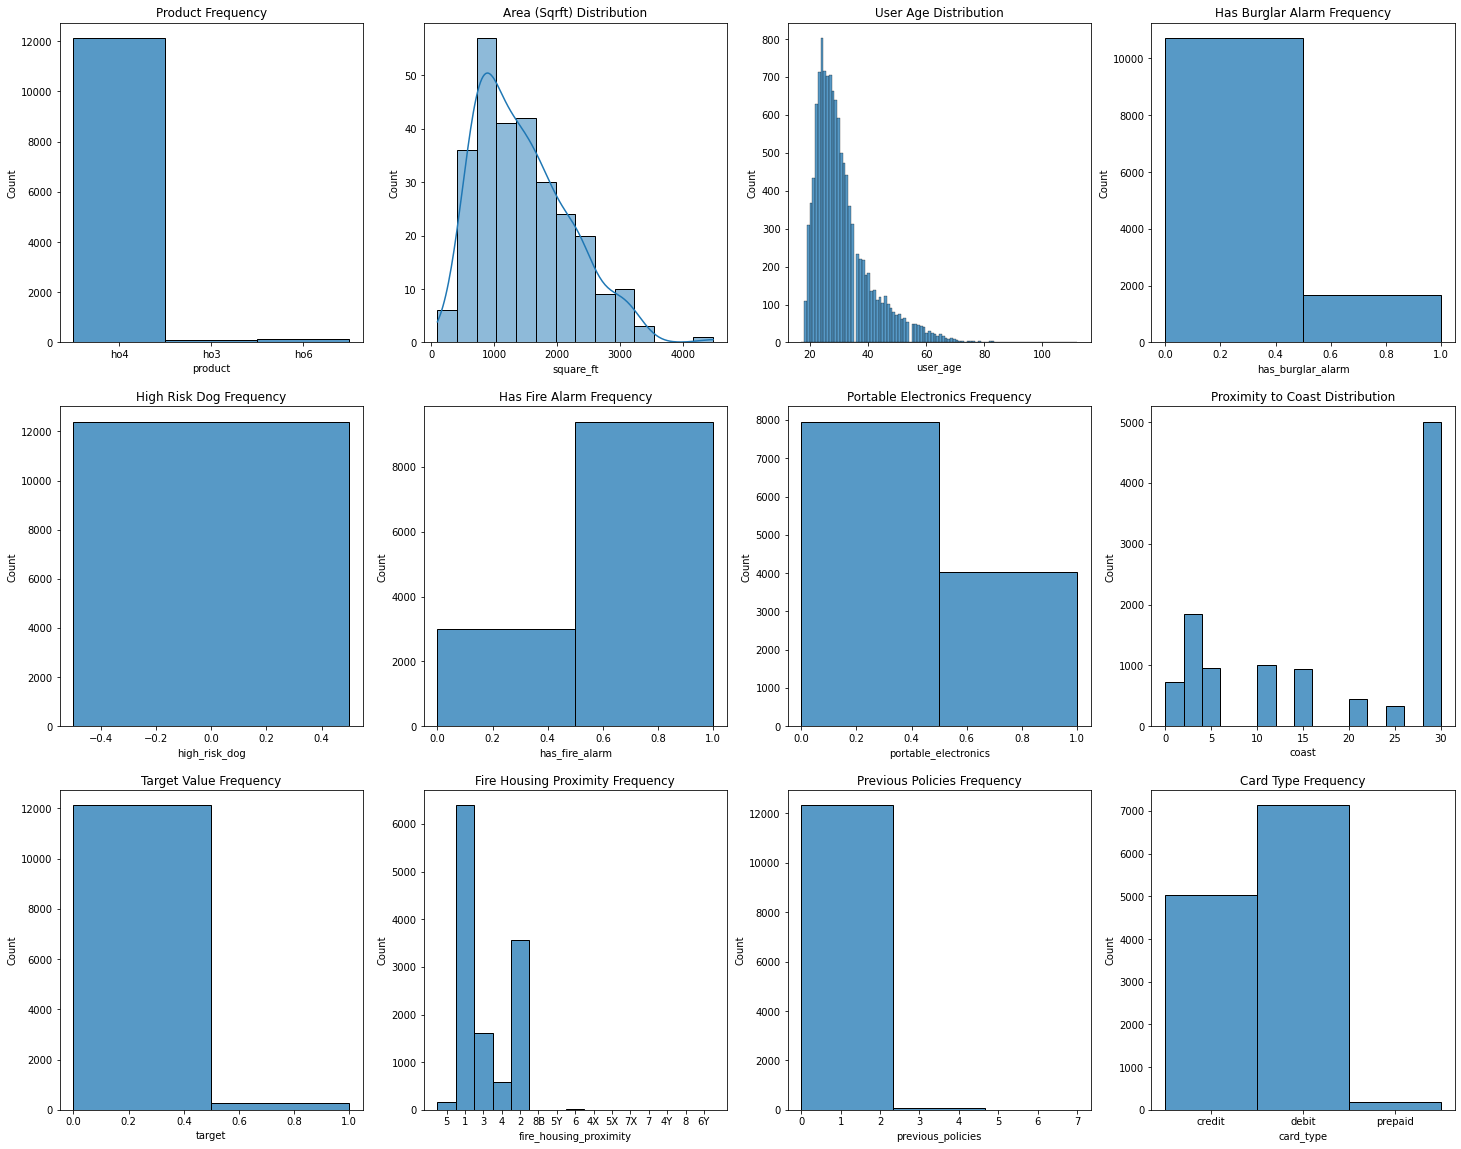

In [ ]:
fig,ax = plt.subplots(3,4,figsize=(25,20))
sns.histplot(data=df, x="product", bins=2, ax=ax[0,0]).set_title('Product Frequency')
sns.histplot(data=df, x="square_ft", kde=True,ax=ax[0,1]).set_title('Area (Sqrft) Distribution')
sns.histplot(data=df, x="user_age",ax=ax[0,2]).set_title('User Age Distribution')
sns.histplot(data=df, x="high_risk_dog", bins=1, ax=ax[1,0]).set_title('High Risk Dog Frequency')
sns.histplot(data=df, x="has_burglar_alarm", bins=2, ax=ax[0,3]).set_title('Has Burglar Alarm Frequency')
sns.histplot(data=df, x="has_fire_alarm", bins=2, ax=ax[1,1]).set_title('Has Fire Alarm Frequency')
sns.histplot(data=df, x="portable_electronics", bins=2, ax=ax[1,2]).set_title('Portable Electronics Frequency')
sns.histplot(data=df, x="coast",ax=ax[1,3]).set_title('Proximity to Coast Distribution')
sns.histplot(data=df, x="fire_housing_proximity",  ax=ax[2,1]).set_title('Fire Housing Proximity Frequency')
sns.histplot(data=df, x="previous_policies", bins=3, ax=ax[2,2]).set_title('Previous Policies Frequency')
sns.histplot(data=df, x="card_type", bins=4, ax=ax[2,3]).set_title('Card Type Frequency')
sns.histplot(data=df, x="target", bins=2, ax=ax[2,0]).set_title('Target Value Frequency')

Number of distinct values for each column

In [ ]:
df.nunique()

id                        12361
state                        21
postal_code                2565
product                       3
user_id                    8965
square_ft                   183
high_risk_dog                 1
has_fire_alarm                2
has_burglar_alarm             2
portable_electronics          2
coast                        11
fire_housing_proximity       15
previous_policies             8
user_age                     72
card_type                     3
target                        2
dtype: int64


- 'id' and 'user_id': Check how many duplicates there are in each of these columns

In [ ]:
print(f'Number of unique id: {df.id.nunique()}')
print(f'Count of id: {df.id.count()}')
print(f'{df.id.duplicated().sum()} duplicate id'+'\n')

print(f'Number of unique user_id: {df.user_id.nunique()}')
print(f'Count of user_id: {df.user_id.count()}')
print(f'{df.user_id.duplicated().sum()} duplicate user_id')

Number of unique id: 12361
Count of id: 12397
36 duplicate id

Number of unique user_id: 8965
Count of user_id: 12397
3432 duplicate user_id


- 'state' (in USA): Only 21 states are represented in the data

In [ ]:
print(f'There are {df.state.nunique()} unique states:')
print(df.state.value_counts())

There are 21 unique states:
CA    3798
TX    3316
NY    2193
IL     833
NJ     421
GA     383
OH     326
NV     212
PA     209
AZ     172
OR     112
MI     110
MD      88
DC      72
WI      48
NM      26
IA      24
CT      22
RI      18
AR      10
IN       4
Name: state, dtype: int64


- 'postal_code': 2565 unique postal codes. not evenly represented

In [ ]:
print(f'There are {df.postal_code.nunique()} unique postal codes.')
print(df.postal_code.value_counts())
print('Postal codes are not evenly represented.')

There are 2565 unique postal codes.
10016    95
10009    76
78741    76
94103    67
94107    66
         ..
8360      1
49332     1
75961     1
45242     1
79911     1
Name: postal_code, Length: 2565, dtype: int64
Postal codes are not evenly represented.


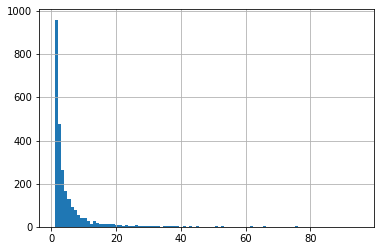

In [ ]:
df.postal_code.value_counts().hist(bins = 95);

- 'product' - 3 types.

In [ ]:
print(df['product'].value_counts())
print(df['product'].value_counts(normalize=True))

ho4    12127
ho6      153
ho3      117
Name: product, dtype: int64
ho4    0.978221
ho6    0.012342
ho3    0.009438
Name: product, dtype: float64


- 'high_risk_dog': is always 0

In [ ]:
df.high_risk_dog.value_counts()

0    12397
Name: high_risk_dog, dtype: int64

- 'has_fire_alarm': most houses have fire alarm.
- 'has_burglar_alarm': most houses DO NOT have burglar alarm.

In [ ]:
print(df.has_fire_alarm.value_counts())
print(df.has_burglar_alarm.value_counts())

True     9395
False    3002
Name: has_fire_alarm, dtype: int64
False    10721
True      1676
Name: has_burglar_alarm, dtype: int64


- 'portable_electronics'

In [ ]:
df.portable_electronics.value_counts()

0.0    7957
1.0    4033
Name: portable_electronics, dtype: int64

- 'coast'

In [ ]:
df.coast.value_counts()

30.0    5007
10.0     998
15.0     942
3.0      927
2.0      915
4.0      667
20.0     444
1.0      429
25.0     329
0.0      300
5.0      284
Name: coast, dtype: int64

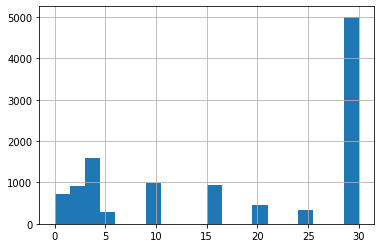

In [ ]:
df.coast.hist(bins=20);

- 'fire_housing_proximity': string variable.

In [ ]:
df.fire_housing_proximity.value_counts()

1     6391
2     3574
3     1616
4      595
5      171
6       27
7        6
8B       3
5X       3
7X       3
8        2
4Y       2
5Y       2
4X       1
6Y       1
Name: fire_housing_proximity, dtype: int64

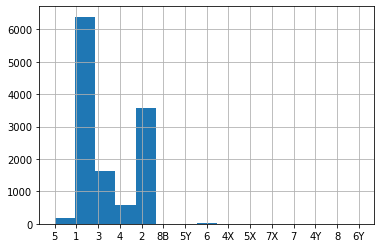

In [ ]:
df.fire_housing_proximity.hist(bins=15);

- 'previous_policies'

In [ ]:
df.previous_policies.value_counts()

0    9898
1    2152
2     275
3      48
4      19
5       3
7       1
6       1
Name: previous_policies, dtype: int64

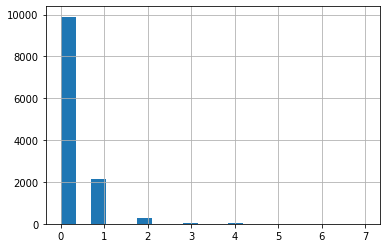

In [ ]:
df.previous_policies.hist(bins=20);

- 'user_age'

In [ ]:
df.user_age.value_counts()

24.0     803
25.0     717
23.0     713
27.0     704
26.0     703
        ... 
112.0      1
17.0       1
99.0       1
77.0       1
87.0       1
Name: user_age, Length: 72, dtype: int64

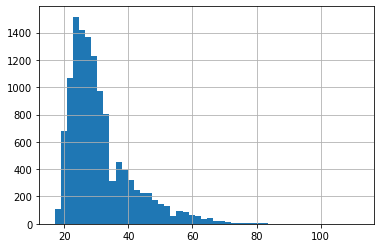

In [ ]:
df.user_age.hist(bins=50);

- 'card_type': 3 types.

In [ ]:
df.card_type.value_counts()

debit      7131
credit     5029
prepaid     185
Name: card_type, dtype: int64

### y-column = 'target'
##### Did the person claim the insurance ('True' or 'False')

In [ ]:
df.target.value_counts()

False    12116
True       281
Name: target, dtype: int64

In [ ]:
df.target.value_counts(normalize=True)

False    0.977333
True     0.022667
Name: target, dtype: float64

## Pandas Profiling Report

In [ ]:
# !pip install pandas-profiling==2.7.1

In [ ]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

### Report summary
 
- Missing cells - 13,814 (7.0%) 
- No duplicate rows

# Data transformations & enrichment

In [ ]:
# different users got the same insurance ids
id_cnt = df.groupby('id').size().sort_values(ascending=False)
duplicate_ids = id_cnt[id_cnt > 1].reset_index().iloc[:,0]
df.loc[df['id'].isin(duplicate_ids)].sort_values('id')

,id,state,postal_code,product,user_id,square_ft,high_risk_dog,has_fire_alarm,has_burglar_alarm,portable_electronics,coast,fire_housing_proximity,previous_policies,user_age,card_type,target
6977,-7.748870e+18,NY,10035,ho4,-8.887240e+18,NaN,0,True,False,0.0,2.0,1,0,26.0,debit,False
9313,-7.748870e+18,TX,79606,ho4,-9.183530e+18,NaN,0,True,False,0.0,30.0,1,0,36.0,debit,False
8287,-7.559100e+18,NY,11218,ho4,-8.903860e+18,NaN,0,True,False,0.0,2.0,1,0,35.0,credit,False
9210,-7.559100e+18,TX,75010,ho4,-8.809910e+18,NaN,0,False,True,1.0,30.0,1,1,30.0,debit,False
140,-6.661250e+18,CT,6040,ho4,-9.108870e+18,NaN,0,False,False,0.0,30.0,3,0,47.0,debit,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,8.298650e+18,NY,10013,ho4,-9.208790e+18,NaN,0,True,False,0.0,1.0,1,0,33.0,credit,False
5368,8.699560e+18,IL,60625,ho4,-9.084710e+18,NaN,0,False,False,1.0,15.0,1,0,23.0,credit,False
57,8.699560e+18,AR,72701,ho4,-8.928630e+18,NaN,0,True,False,1.0,NaN,1,0,19.0,debit,False
5803,9.131290e+18,NJ,8817,ho4,-8.955900e+18,NaN,0,True,False,0.0,10.0,3,0,26.0,credit,False


In [ ]:
# dropping rows (72 rows) with duplicate ids cause they make no sense. Now every row represents a unique policy
df = df.loc[~df['id'].isin(duplicate_ids)]

In [ ]:
# adding 'multiple_policies' column
multiple_policies_users = df.groupby('user_id')['user_id'].filter(lambda x: len(x) > 1)
df.loc[df['user_id'].isin(multiple_policies_users), 'has_multiple_policies'] = 1
df.loc[~df['user_id'].isin(multiple_policies_users), 'has_multiple_policies'] = 0

In [ ]:
df.has_multiple_policies.value_counts()

0.0    6275
1.0    6050
Name: has_multiple_policies, dtype: int64

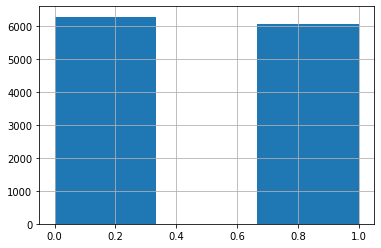

In [ ]:
df.has_multiple_policies.hist(bins=3);

In [ ]:
# turning state to full name
conditions = [
    (df['state'] == 'AR'),
    (df['state'] == 'AZ'),
    (df['state'] == 'CA'),
    (df['state'] == 'CT'),
    (df['state'] == 'DC'),
    (df['state'] == 'GA'),
    (df['state'] == 'IA'),
    (df['state'] == 'IL'),
    (df['state'] == 'IN'),
    (df['state'] == 'MD'),
    (df['state'] == 'MI'),
    (df['state'] == 'NJ'),
    (df['state'] == 'NM'),
    (df['state'] == 'NV'),
    (df['state'] == 'NY'),
    (df['state'] == 'OH'),
    (df['state'] == 'OR'),
    (df['state'] == 'PA'),
    (df['state'] == 'RI'),
    (df['state'] == 'TX'),
    (df['state'] == 'WI')          
]
values = ['ARKANSAS','ARIZONA','CALIFORNIA','CONNECTICUT','DISTRICT OF COLUMBIA','GEORGIA','IOWA','ILLINOIS','INDIANA',
          'MARYLAND','MICHIGAN','NEW JERSEY','NEW MEXICO','NEVADA','NEW YORK','OHIO','OREGON','PENNSYLVANIA','RHODE ISLAND','TEXAS','WISCONSIN']
df['state'] = np.select(conditions, values)

In [ ]:
# fixing postal_code 4 characters to 5 characters
df['ZipLen'] = df['postal_code'].astype(str).map(len)
df.loc[df['ZipLen']==5,'postal_code'] = df["postal_code"].astype(str)
df.loc[df['ZipLen']==4,'postal_code'] = "0" + df["postal_code"].astype(str)
df = df.drop(['ZipLen'], axis=1) #Drop Ziplen column (not needed anymore)

In [ ]:
# turning coast numeric column into categorical bins: high(0-5), medium (6-29), low(30+)
bins = [-1, 5, 29, np.inf]
names = ['high', 'medium', 'low']

df['close_to_coast_risk'] = pd.cut(df['coast'], bins, labels=names)
df['close_to_coast_risk'] = df['close_to_coast_risk'].fillna('low')
df.close_to_coast_risk.value_counts()

low       6128
high      3503
medium    2694
Name: close_to_coast_risk, dtype: int64

In [ ]:
df[['coast', 'close_to_coast_risk']].drop_duplicates().sort_values(by=['coast'])

,coast,close_to_coast_risk
6,0.0,high
2,1.0,high
17,2.0,high
65,3.0,high
399,4.0,high
44,5.0,high
8,10.0,medium
19,15.0,medium
21,20.0,medium
86,25.0,medium


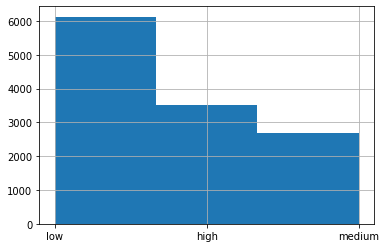

In [ ]:
df.close_to_coast_risk.hist(bins=3);

In [ ]:
# adding 'is_coastal_state' column
coastal_states = ['CALIFORNIA','CONNECTICUT','DISTRICT OF COLUMBIA','GEORGIA',
          'MARYLAND','NEW JERSEY','NEW YORK','OREGON','PENNSYLVANIA','RHODE ISLAND','TEXAS']

df['is_coastal_state'] = df['state'].apply(lambda x: x in coastal_states).astype(int) # another way: df['is_coastal_state'] = df['state'].isin(is_coastal_state).astype(int)

In [ ]:
df.is_coastal_state.value_counts()

1    10569
0     1756
Name: is_coastal_state, dtype: int64

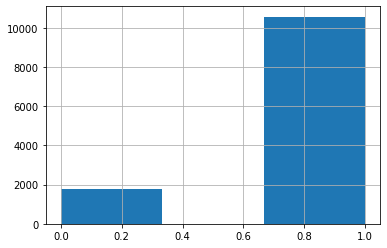

In [ ]:
df.is_coastal_state.hist(bins=3);

In [ ]:
df[['state', 'is_coastal_state']].drop_duplicates().sort_values(by=['state'])

,state,is_coastal_state
152,ARIZONA,0
4,ARKANSAS,0
324,CALIFORNIA,1
14,CONNECTICUT,1
4122,DISTRICT OF COLUMBIA,1
4194,GEORGIA,1
4577,ILLINOIS,0
62,INDIANA,0
9,IOWA,0
5410,MARYLAND,1


In [ ]:
# fire_housing_proximity - leaving only number since we know there is a meaning if a number is low or high
df['fire_housing_proximity'] = df['fire_housing_proximity'].str[:1].astype(int)

In [ ]:
df.fire_housing_proximity.value_counts()

1    6349
2    3554
3    1608
4     596
5     176
6      28
7       9
8       5
Name: fire_housing_proximity, dtype: int64

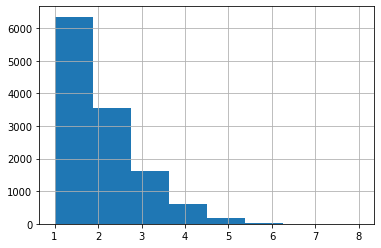

In [ ]:
df.fire_housing_proximity.hist(bins=8);

In [ ]:
# adding 'has_previous_policies' column 
df['has_previous_policies']= [0 if i==0 else 1 for i in df.previous_policies]
df['has_previous_policies'].value_counts()

0    9836
1    2489
Name: has_previous_policies, dtype: int64

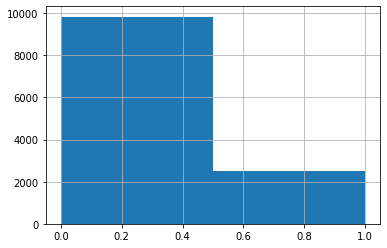

In [ ]:
df.has_previous_policies.hist(bins=2);

In [ ]:
# adding 'disasters' column

# Load number of natural diasters since 1953 by state
# from https://worldpopulationreview.com/state-rankings/states-with-the-least-natural-disasters
path = csv_drive_path_generator('https://drive.google.com/file/d/1aStihGFAGHUrT1gh5OMlUDGHsO6ca8_V/view?usp=sharing')
col_list = ["State", "disasters"]
#df = pd.read_csv("sample_file.csv", usecols=col_list)
disasters_df = pd.read_csv(path,usecols=col_list)

In [ ]:
disasters_df

,State,disasters
0,California,284
1,Texas,255
2,Oklahoma,173
3,Washington,136
4,Florida,130
5,New York,95
6,New Mexico,83
7,Alabama,82
8,Colorado,80
9,Oregon,79


In [ ]:
# Merge disasters with main table
#disasters=disasters.drop(['Pop'],axis=1)
disasters_df['State'] = disasters_df['State'].str.upper()
df = pd.merge(df, disasters_df, how='left', left_on='state', right_on='State')

In [ ]:
df.disasters.value_counts()

284.0    3779
255.0    3296
95.0     2177
60.0      826
50.0      419
65.0      383
54.0      326
73.0      212
59.0      207
68.0      172
79.0      111
37.0      110
32.0       88
47.0       48
83.0       26
63.0       23
31.0       21
22.0       18
71.0        9
48.0        4
Name: disasters, dtype: int64

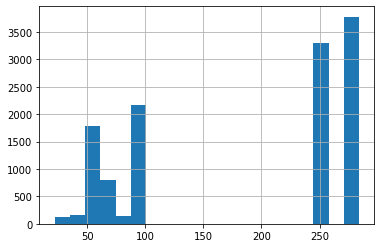

In [ ]:
df.disasters.hist(bins=20);

In [ ]:
# adding 'CrimeGrade' column

# Load scraped crime grades by zipcodes
# Scraped from crimegrade.org
path = csv_drive_path_generator('https://drive.google.com/file/d/1aQ3aG2lkPB_AcV9h-tu7VyQibSokw1hG/view?usp=sharing')
crime_grades_df = pd.read_csv(path,dtype={'postal_code': str})

In [ ]:
crime_grades_df

,postal_code,CrimeGrade
0,02840,D-
1,02860,D+
2,02864,A
3,02871,A
4,02903,D
...,...,...
2560,97405,D+
2561,97477,D+
2562,97540,C
2563,97701,C+


In [ ]:
# Merge crime grades with main table
df = pd.merge(df, crime_grades_df, how='left', left_on='postal_code', right_on='postal_code')
df.rename(columns={'CrimeGrade': 'crime_grade'}, inplace=True)

In [ ]:
df.crime_grade.value_counts()

F     2560
D-    1815
D     1351
D+    1225
C-    1159
C      909
C+     747
B-     704
B      513
B+     480
A-     383
A+     241
A      238
Name: crime_grade, dtype: int64

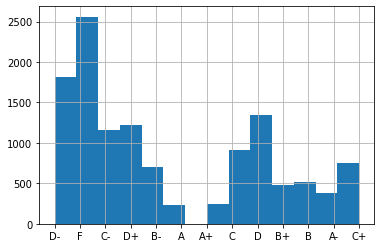

In [ ]:
df.crime_grade.hist(bins=14);

In [ ]:
df.head()

,id,state,postal_code,product,user_id,square_ft,high_risk_dog,has_fire_alarm,has_burglar_alarm,portable_electronics,coast,fire_housing_proximity,previous_policies,user_age,card_type,target,has_multiple_policies,close_to_coast_risk,is_coastal_state,has_previous_policies,State,disasters,crime_grade
0,2.492010e+18,NEW MEXICO,87043,ho4,-9.160050e+18,NaN,0,True,True,0.0,NaN,5,0,39.0,credit,False,0.0,low,0,0,NEW MEXICO,83.0,D-
1,8.860750e+17,WISCONSIN,53715,ho4,-8.929000e+18,NaN,0,True,False,1.0,30.0,1,0,19.0,debit,False,0.0,low,0,0,WISCONSIN,47.0,F
2,5.527290e+18,WISCONSIN,53211,ho4,-9.015980e+18,NaN,0,True,False,1.0,1.0,1,0,20.0,debit,True,1.0,high,0,0,WISCONSIN,47.0,C-
3,6.453400e+18,NEW MEXICO,88012,ho4,-9.060030e+18,NaN,0,True,True,1.0,NaN,1,0,33.0,debit,False,1.0,low,0,0,NEW MEXICO,83.0,D+
4,-8.836390e+18,ARKANSAS,72116,ho4,-8.801720e+18,NaN,0,False,False,1.0,NaN,1,0,20.0,debit,False,0.0,low,0,0,ARKANSAS,71.0,C-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12325 entries, 0 to 12324
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      12325 non-null  float64 
 1   state                   12325 non-null  object  
 2   postal_code             12325 non-null  object  
 3   product                 12325 non-null  object  
 4   user_id                 12325 non-null  float64 
 5   square_ft               278 non-null    float64 
 6   high_risk_dog           12325 non-null  int64   
 7   has_fire_alarm          12325 non-null  bool    
 8   has_burglar_alarm       12325 non-null  bool    
 9   portable_electronics    11921 non-null  float64 
 10  coast                   11175 non-null  float64 
 11  fire_housing_proximity  12325 non-null  int64   
 12  previous_policies       12325 non-null  int64   
 13  user_age                12243 non-null  float64 
 14  card_type             

## Dropping columns

In [ ]:
# drop redundant columns: 
# id - no meaning to the unique id column
# user_id - no meaning to the column by itself - we created another column from it: 'has_multiple_policies'
# high_risk_dog - has only 0 value
# coast - we created another column from it: 'close_to_coast_risk'
# previous_policies - we created another column from it: 'has_previous_policies' 
# State - redundant column that came from merge with disasters_df
# postal_code - in the df, there are 2565 unique postal codes. many of them appear once or twice. There are over ~40,000 unique postal codes in the US.
# we substituted this feature with crime_grade which is rellevant feature of postal_code in terms of insurance.

columns_to_drop = ['id', 'user_id', 'high_risk_dog', 'coast', 'previous_policies', 'State', 'postal_code']
df = df.drop(columns=columns_to_drop)

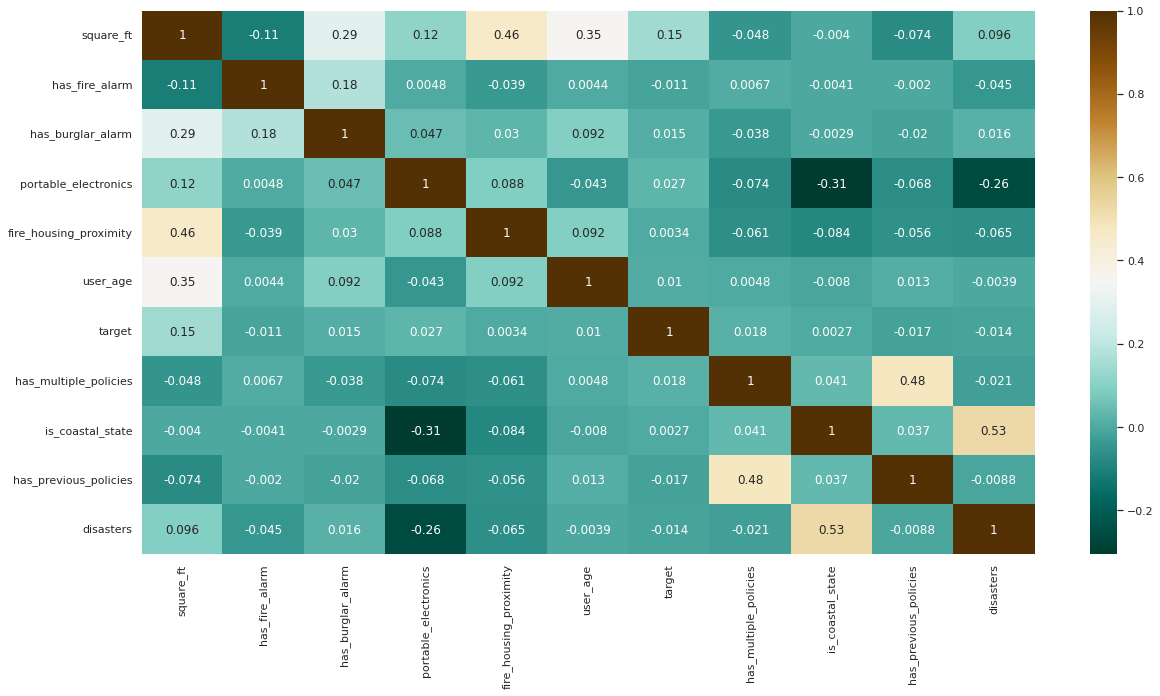

In [ ]:
## **Plot Correlations**
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

# Handling missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

square_ft                 12047
portable_electronics        404
user_age                     82
disasters                    70
card_type                    52
crime_grade                   0
has_previous_policies         0
is_coastal_state              0
close_to_coast_risk           0
has_multiple_policies         0
target                        0
fire_housing_proximity        0
has_burglar_alarm             0
has_fire_alarm                0
product                       0
state                         0
dtype: int64

In [ ]:
# square_ft - after checking: there are 278 rows with square_ft values. Out of those only 9 are "True" on target variable.
df = df.drop('square_ft',axis=1)
# Considered filling square_ft NaN with mean square_ft 
#df['square_ft'] = df['square_ft'].fillna(np.mean(df['square_ft']))

In [ ]:
# Fill user_age NaN with mean user_age 
mean = df.user_age.mean()
print(mean)
df['user_age'].fillna(mean, inplace=True)

31.09850526831659


In [ ]:
# Fill card_type NaN with 'no info' label 
df['card_type'].fillna('no info', inplace=True)

In [ ]:
# Fill portable_electronics NaN with 'no info' label 
df['portable_electronics'].fillna('no info', inplace=True)

In [ ]:
# Let's look at the Null values in the disasters column.
# They are all from DC.
df[df['disasters'].isnull()]

,state,product,has_fire_alarm,has_burglar_alarm,portable_electronics,fire_housing_proximity,user_age,card_type,target,has_multiple_policies,close_to_coast_risk,is_coastal_state,has_previous_policies,disasters,crime_grade
4100,DISTRICT OF COLUMBIA,ho4,True,False,1,2,47.0,debit,False,0.0,low,1,0,NaN,C+
4101,DISTRICT OF COLUMBIA,ho4,True,False,1,2,27.0,credit,False,1.0,low,1,0,NaN,F
4102,DISTRICT OF COLUMBIA,ho4,True,False,0,2,25.0,credit,False,0.0,low,1,0,NaN,F
4103,DISTRICT OF COLUMBIA,ho4,True,False,1,2,32.0,credit,False,0.0,low,1,0,NaN,F
4104,DISTRICT OF COLUMBIA,ho4,True,False,1,2,52.0,debit,False,0.0,low,1,0,NaN,D-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,DISTRICT OF COLUMBIA,ho4,True,True,1,2,31.0,debit,False,1.0,low,1,1,NaN,F
4166,DISTRICT OF COLUMBIA,ho4,True,False,1,2,32.0,debit,True,0.0,medium,1,0,NaN,F
4167,DISTRICT OF COLUMBIA,ho6,True,True,1,2,37.0,credit,False,0.0,low,1,0,NaN,D
4168,DISTRICT OF COLUMBIA,ho4,True,False,1,2,26.0,credit,False,0.0,low,1,0,NaN,D


In [ ]:
# Fill number of disasters in DC with value for state of Maryland
dc_disasters = disasters_df[disasters_df['State'] == 'MARYLAND']['disasters'].values[0]
df['disasters'].fillna(dc_disasters, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

crime_grade               0
disasters                 0
has_previous_policies     0
is_coastal_state          0
close_to_coast_risk       0
has_multiple_policies     0
target                    0
card_type                 0
user_age                  0
fire_housing_proximity    0
portable_electronics      0
has_burglar_alarm         0
has_fire_alarm            0
product                   0
state                     0
dtype: int64

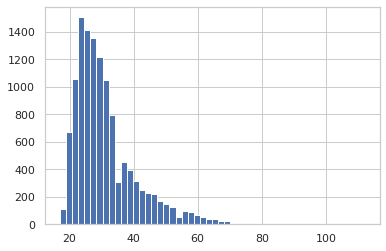

In [ ]:
df.user_age.hist(bins=50);

In [ ]:
df.user_age.describe()

count    12325.000000
mean        31.098505
std          9.977552
min         17.000000
25%         24.000000
50%         29.000000
75%         35.000000
max        112.000000
Name: user_age, dtype: float64

In [ ]:
# turning user_age numeric column into categorical bins
bins = [-1, 24, 34, 44, 54, 64, np.inf]
names = ['<25', '25-34', '35-44', '45-54', '55-64', '>65']

df['user_age_cat'] = pd.cut(df['user_age'], bins, labels=names)
df.user_age_cat.value_counts()

25-34    5837
<25      3346
35-44    1842
45-54     826
55-64     342
>65       132
Name: user_age_cat, dtype: int64

In [ ]:
# we no longer need 'user_age' column
df = df.drop('user_age', axis=1)

# Features Pre Processing

In [ ]:
# changing target to 1/0
df['target']= [1 if i==True else 0 for i in df.target]
df['target'].value_counts()

0    12046
1      279
Name: target, dtype: int64

In [ ]:
# changing booleans from True/False to 1/0
df['has_fire_alarm']= [1 if i==True else 0 for i in df.has_fire_alarm]
df['has_burglar_alarm']= [1 if i==True else 0 for i in df.has_burglar_alarm]

In [ ]:
# turning crime grades to numeric
# https://www.researchgate.net/figure/Letter-Grade-to-Numeric-Grade-Conversion-Chart_tbl5_28799460

conditions = [
    (df['crime_grade'] == 'A+'),
    (df['crime_grade'] == 'A'),
    (df['crime_grade'] == 'A-'),
    (df['crime_grade'] == 'B+'),
    (df['crime_grade'] == 'B'),
    (df['crime_grade'] == 'B-'),
    (df['crime_grade'] == 'C+'),
    (df['crime_grade'] == 'C'),
    (df['crime_grade'] == 'C-'),
    (df['crime_grade'] == 'D+'),
    (df['crime_grade'] == 'D'),
    (df['crime_grade'] == 'D-'),
    (df['crime_grade'] == 'F'),     
]
values = [97,95,92,87,85,82,77,75,72,67,65,62,50]
df['crime_grade_numeric'] = np.select(conditions, values)

In [ ]:
# we no longer need 'crime_grade' column
df = df.drop('crime_grade', axis=1)

# Get Dummies 

In [ ]:
# column_names = ["card_type", "product", "close_to_coast_risk", "portable_electronics", "user_age_cat"]

# df = pd.get_dummies(df, columns = column_names)

In [ ]:
# Get dummy variables for categorical features
df = pd.concat([df,pd.get_dummies(df['card_type'], prefix='card_is')],axis=1)
df = pd.concat([df,pd.get_dummies(df['product'], prefix='product_is')],axis=1)
df = pd.concat([df,pd.get_dummies(df['close_to_coast_risk'], prefix='coast_risk_is')],axis=1)
df = pd.concat([df,pd.get_dummies(df['portable_electronics'], prefix='portable_electronics_is')],axis=1)
df = pd.concat([df,pd.get_dummies(df['user_age_cat'], prefix='user_age_cat_is')],axis=1)

In [ ]:
# Drop columns after get_dummies()
columns_to_drop = ['card_type', 'product', 'close_to_coast_risk', 'portable_electronics', 'user_age_cat']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12325 entries, 0 to 12324
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state                            12325 non-null  object 
 1   has_fire_alarm                   12325 non-null  int64  
 2   has_burglar_alarm                12325 non-null  int64  
 3   fire_housing_proximity           12325 non-null  int64  
 4   target                           12325 non-null  int64  
 5   has_multiple_policies            12325 non-null  float64
 6   is_coastal_state                 12325 non-null  int64  
 7   has_previous_policies            12325 non-null  int64  
 8   disasters                        12325 non-null  float64
 9   crime_grade_numeric              12325 non-null  int64  
 10  card_is_credit                   12325 non-null  uint8  
 11  card_is_debit                    12325 non-null  uint8  
 12  card_is_no info   

# Feature Selection (Correlation)

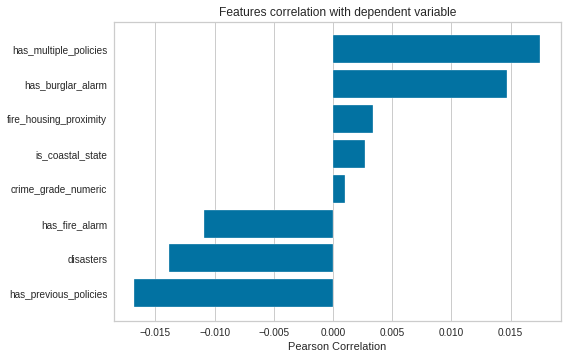

In [ ]:
# Correlation of features with target
from yellowbrick.target.feature_correlation import feature_correlation

feature_columns = ['has_fire_alarm', 'has_burglar_alarm', 'has_previous_policies','has_multiple_policies','is_coastal_state', 'fire_housing_proximity','disasters','crime_grade_numeric']
X1, y1 = df[feature_columns], df['target']
features = np.array(feature_columns)
visualizer = feature_correlation(X1, y1,sort=True)

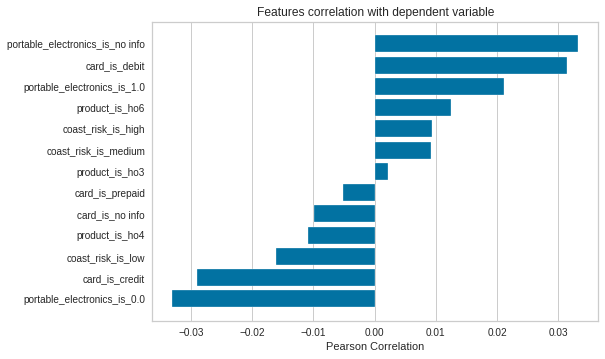

In [ ]:
feature_dummies=['card_is_credit','card_is_debit','card_is_no info','card_is_prepaid','product_is_ho3','product_is_ho4','product_is_ho6','coast_risk_is_high','coast_risk_is_medium','coast_risk_is_low',
                 'portable_electronics_is_0.0','portable_electronics_is_1.0','portable_electronics_is_no info']
X2, y2 = df[feature_dummies], df['target']
features = np.array(feature_dummies)
visualizer = feature_correlation(X2, y2,sort=True)

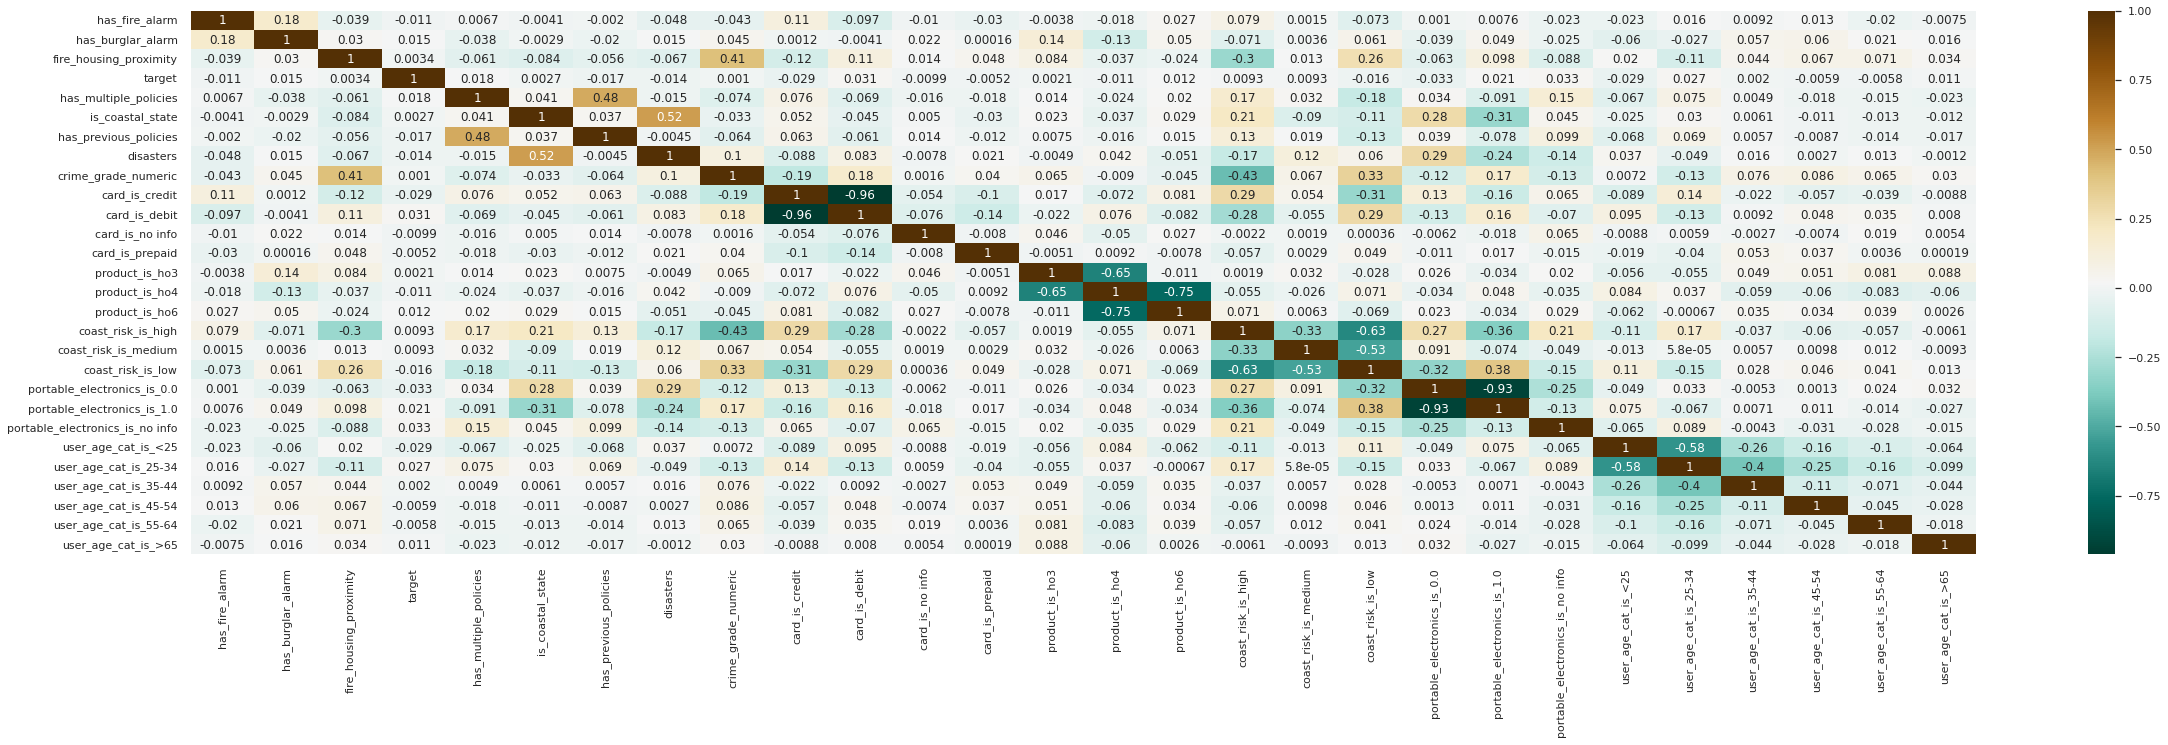

In [ ]:
# **Plot Correlations**
corr_matrix = df.corr()
plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12});

# Dropping duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12325 entries, 0 to 12324
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state                            12325 non-null  object 
 1   has_fire_alarm                   12325 non-null  int64  
 2   has_burglar_alarm                12325 non-null  int64  
 3   fire_housing_proximity           12325 non-null  int64  
 4   target                           12325 non-null  int64  
 5   has_multiple_policies            12325 non-null  float64
 6   is_coastal_state                 12325 non-null  int64  
 7   has_previous_policies            12325 non-null  int64  
 8   disasters                        12325 non-null  float64
 9   crime_grade_numeric              12325 non-null  int64  
 10  card_is_credit                   12325 non-null  uint8  
 11  card_is_debit                    12325 non-null  uint8  
 12  card_is_no info   

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7175 entries, 0 to 12324
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state                            7175 non-null   object 
 1   has_fire_alarm                   7175 non-null   int64  
 2   has_burglar_alarm                7175 non-null   int64  
 3   fire_housing_proximity           7175 non-null   int64  
 4   target                           7175 non-null   int64  
 5   has_multiple_policies            7175 non-null   float64
 6   is_coastal_state                 7175 non-null   int64  
 7   has_previous_policies            7175 non-null   int64  
 8   disasters                        7175 non-null   float64
 9   crime_grade_numeric              7175 non-null   int64  
 10  card_is_credit                   7175 non-null   uint8  
 11  card_is_debit                    7175 non-null   uint8  
 12  card_is_no info    

# Prepare for models

## Splitting the Data 

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Target Encoding

In [ ]:
encoder = TargetEncoder()
X_train['state'] = encoder.fit_transform(X_train['state'], y_train)
X_test['state'] = encoder.transform(X_test['state'])

In [ ]:
# We decided to drop the column postal_code
# encoder = TargetEncoder()
# X_train['postal_code'] = encoder.fit_transform(X_train['postal_code'], y_train)
# X_test['postal_code'] = encoder.transform(X_test['postal_code'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5740 entries, 5351 to 1020
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state                            5740 non-null   float64
 1   has_fire_alarm                   5740 non-null   int64  
 2   has_burglar_alarm                5740 non-null   int64  
 3   fire_housing_proximity           5740 non-null   int64  
 4   has_multiple_policies            5740 non-null   float64
 5   is_coastal_state                 5740 non-null   int64  
 6   has_previous_policies            5740 non-null   int64  
 7   disasters                        5740 non-null   float64
 8   crime_grade_numeric              5740 non-null   int64  
 9   card_is_credit                   5740 non-null   uint8  
 10  card_is_debit                    5740 non-null   uint8  
 11  card_is_no info                  5740 non-null   uint8  
 12  card_is_prepaid  

## Scaling

Remember: we don't want to suffer from data leakage so we fit and transform the training set, while only transforming the test set

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (5740, 28)
X_test:  (1435, 28)
y_train:  (5740,)
y_test:  (1435,)


## Imbalanced Data Engineering
We take care of imbalanced data only in *Train set*.

**The chosen techniques**:
We first **oversample** the minority class to have 10 percent the number of examples of the majority class (227 --> about 1,000), then use **random undersampling** to reduce the number of examples in the majority class to have 50 percent more than the minority class (about 2,000).

**Oversampling Technique implementation explanation:**

Instead of just duplicating examples in the minority class, we can use the SMOTE (Synthetic Minority Oversampling Technique) implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
#pip install imbalanced-learn

In [ ]:
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 5529, 1: 211})


In [ ]:
y_train_imbalanced = pd.DataFrame (y_train, columns = ['target'])
print (y_train_imbalanced)

      target
5351       1
8487       0
3021       0
8388       0
6070       0
...      ...
5867       0
8920       0
8958       0
9139       0
1020       0

[5740 rows x 1 columns]


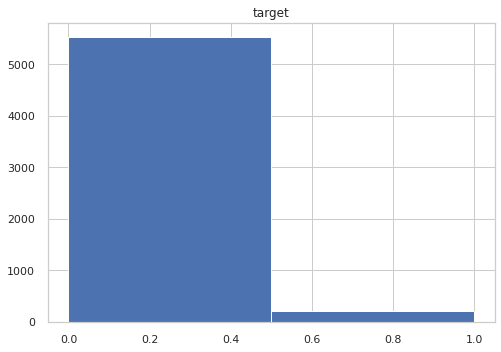

In [ ]:
y_train_imbalanced.hist(bins=2);

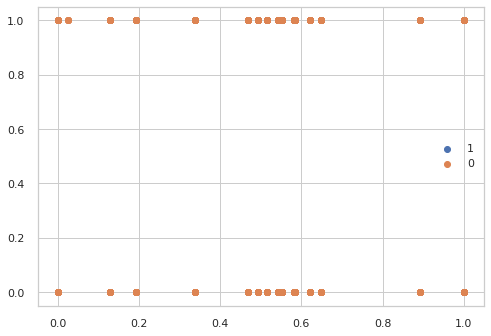

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y_train == label)[0]
	plt.scatter(X_train[row_ix,0], X_train[row_ix,1], label=str(label))

plt.legend()
plt.show()

In [ ]:
# specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes
over = SMOTE(sampling_strategy=0.1, random_state=42) # 5529 (0) --> 552 (1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42) # 552 (1) --> 1104 (0)

In [ ]:
# chaining these two transforms together into a Pipeline
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 1104, 1: 552})


In [ ]:
y_train_balanced = pd.DataFrame (y_train, columns = ['target'])
print (y_train_balanced)

      target
0          0
1          0
2          0
3          0
4          0
...      ...
1651       1
1652       1
1653       1
1654       1
1655       1

[1656 rows x 1 columns]


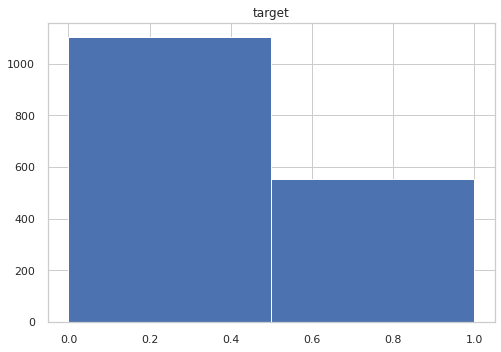

In [ ]:
y_train_balanced.hist(bins=2);

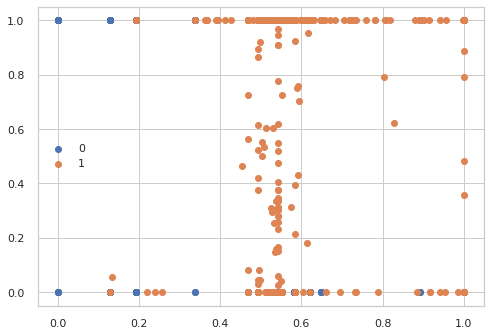

In [ ]:
# a scatter plot of the transformed dataset. It shows many more examples in the minority class created along the lines between the original examples in the minority class.
for label, _ in counter.items():
	row_ix = np.where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# <u>Decision Tree Classifier</u>

In [ ]:
dt = DecisionTreeClassifier(splitter="random", max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, random_state=111)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='random')

### Visualize the tree

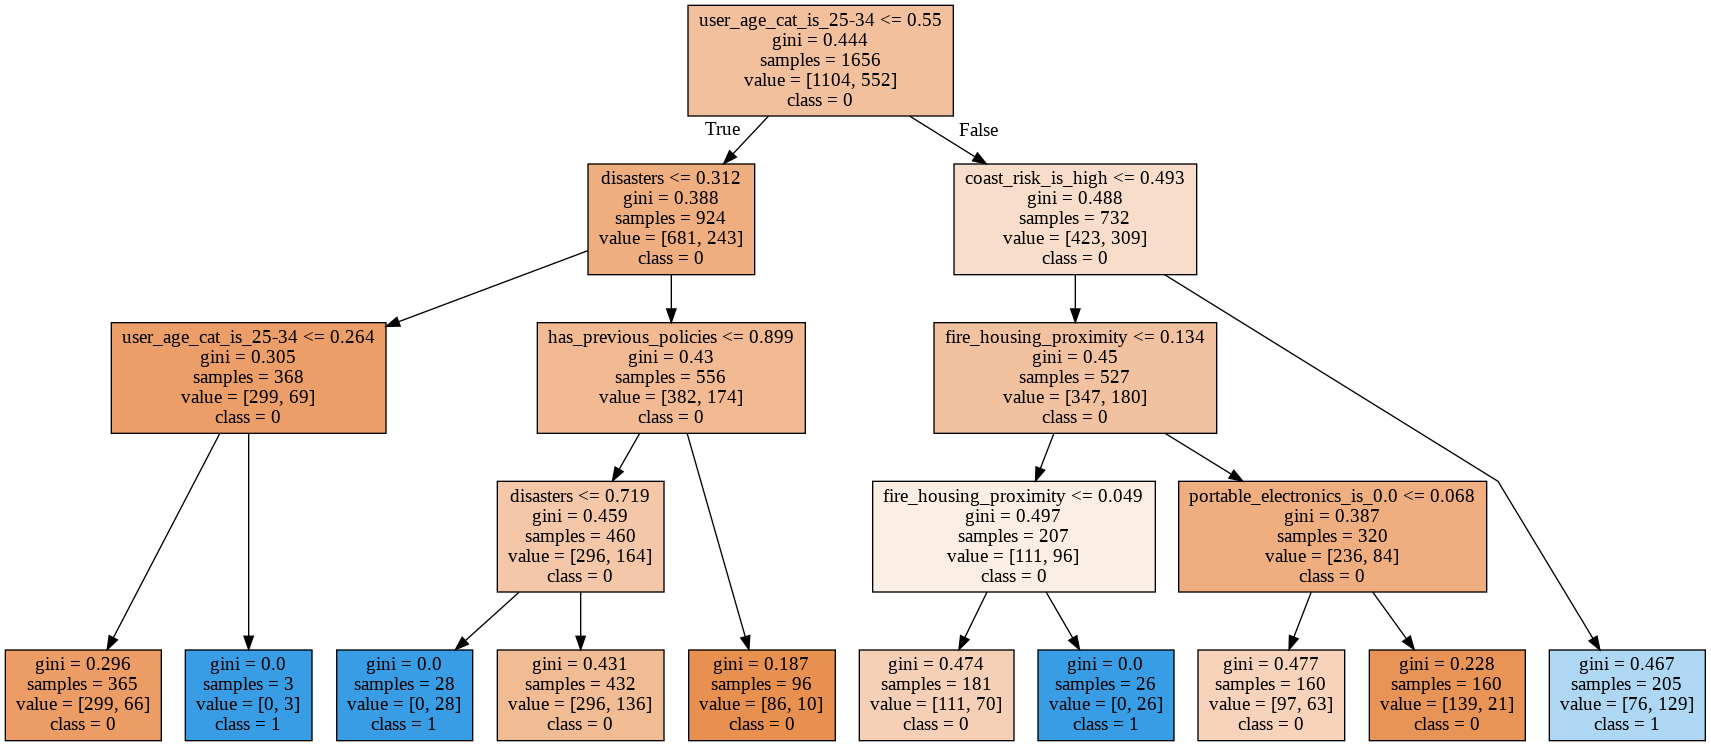

In [ ]:
target_names = ['0', '1']

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
                leaves_parallel=True, filled=True, class_names=target_names)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1000)

### feature importances

In [ ]:
pd.Series(dt.feature_importances_,
          index=X.columns).sort_values(ascending=False)

disasters                          0.245046
fire_housing_proximity             0.211170
user_age_cat_is_25-34              0.191037
coast_risk_is_high                 0.189118
portable_electronics_is_0.0        0.085332
has_previous_policies              0.078296
user_age_cat_is_>65                0.000000
card_is_no info                    0.000000
has_fire_alarm                     0.000000
has_burglar_alarm                  0.000000
has_multiple_policies              0.000000
is_coastal_state                   0.000000
crime_grade_numeric                0.000000
card_is_credit                     0.000000
card_is_debit                      0.000000
product_is_ho3                     0.000000
card_is_prepaid                    0.000000
user_age_cat_is_55-64              0.000000
product_is_ho4                     0.000000
product_is_ho6                     0.000000
coast_risk_is_medium               0.000000
coast_risk_is_low                  0.000000
portable_electronics_is_1.0     

In [ ]:
y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1203,177
1,38,17


In [ ]:
# Metrics
accuracy_dt_random = dt.score(X_test, y_test)
precision_dt_random = precision_score(y_test, y_pred)
recall_dt_random = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_dt_random = sqrt(meanSquaredError)
print ("Random Decision Tree Classifier Metrics")
print("Train f1-score:", f1_score(y_train,y_train_pred))
print('Train roc-auc:', roc_auc_score(y_train,y_train_pred))
print('--------------')
print("Test f1-score:", f1_score(y_test, y_pred))
print('Test roc-auc:', roc_auc_score(y_test,y_pred))
print('--------------')
print("Accuracy:",accuracy_dt_random)
print("Precision:",precision_dt_random)
print("Recall:",recall_dt_random)
print("RMSE:", RMSE_dt_random)

Random Decision Tree Classifier Metrics
Train f1-score: 0.457002457002457
Train roc-auc: 0.6340579710144928
--------------
Test f1-score: 0.1787709497206704
Test roc-auc: 0.6063241106719368
--------------
Accuracy: 0.8975609756097561
Precision: 0.12903225806451613
Recall: 0.2909090909090909
RMSE: 0.32006096980144877


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

## Grid Search based on Decision Tree (with 10-Fold cross-validation)

In [ ]:
dt_param_grid = {'max_depth': [3, 7, 12], 'min_samples_leaf': [5, 15, 40],'min_samples_split': [3, 5, 10]} # 'max_leaf_nodes': [5,8]

### f1 scoring

In [ ]:
grid_dt_f1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='f1', cv=10)

grid_dt_f1.fit(X_train, y_train)

df_results_train = pd.DataFrame(grid_dt_f1.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

In [ ]:
print("Best parameters: {}".format(grid_dt_f1.best_params_))
print("Best f1 score is {:.3f}".format(grid_dt_f1.best_score_))

scores_mean = df_results_train['mean_test_score'].mean()
scores_std = df_results_train['mean_test_score'].std()

#print("Mean f1 score {:.3f}, STD {:.3f}".format(scores_mean, scores_std))

Best parameters: {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best f1 score is 0.621


In [ ]:
# now we train the tree again on the whole train set with the best params from the grid search
dt = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#dt_f1_gs_f1_score = f1_score(y_test, y_pred)
#dt_f1_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", dt_f1_gs_f1_score)
#print('Test roc-auc:', dt_f1_gs_auc_score)

In [ ]:
cm_dt_f1 = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_dt_f1,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1210,170
1,41,14


In [ ]:
# Metrics
dt_f1_gs_f1_score_train = f1_score(y_train,y_train_pred)
dt_f1_gs_f1_score_test = f1_score(y_test, y_pred)
#dt_f1_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
dt_f1_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_dt_f1_gs = dt.score(X_test, y_test)
precision_dt_f1_gs = precision_score(y_test, y_pred)
recall_dt_f1_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_dt_f1_gs = sqrt(meanSquaredError)
print ("Decision Tree Classifier Metrics - GS with f1 scoring")
print("Train f1-score:", dt_f1_gs_f1_score_train)
#print('Train roc-auc:', dt_f1_gs_auc_score)
print('--------------')
print("Test f1-score:", dt_f1_gs_f1_score_test)
print('Test roc-auc:', roc_auc_score(y_test,y_pred))
print('--------------')
print("Accuracy:",accuracy_dt_f1_gs)
print("Precision:",precision_dt_f1_gs)
print("Recall:",recall_dt_f1_gs)
print("RMSE:", RMSE_dt_f1_gs)

Decision Tree Classifier Metrics - GS with f1 scoring
Train f1-score: 0.8204633204633205
--------------
Test f1-score: 0.11715481171548117
Test roc-auc: 0.5656785243741764
--------------
Accuracy: 0.8529616724738676
Precision: 0.07608695652173914
Recall: 0.2545454545454545
RMSE: 0.3834557699737121


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1380
           1       0.08      0.25      0.12        55

    accuracy                           0.85      1435
   macro avg       0.52      0.57      0.52      1435
weighted avg       0.93      0.85      0.89      1435



In [ ]:
pd.Series(dt.feature_importances_,
          index=X.columns).sort_values(ascending=False)

fire_housing_proximity             0.425915
crime_grade_numeric                0.091876
user_age_cat_is_25-34              0.078976
state                              0.069354
has_multiple_policies              0.045967
coast_risk_is_low                  0.040930
disasters                          0.033966
has_fire_alarm                     0.030120
portable_electronics_is_0.0        0.029851
has_previous_policies              0.027068
user_age_cat_is_35-44              0.020130
has_burglar_alarm                  0.019395
card_is_debit                      0.018029
coast_risk_is_medium               0.017162
card_is_credit                     0.012210
portable_electronics_is_1.0        0.010948
user_age_cat_is_<25                0.010803
product_is_ho6                     0.007138
coast_risk_is_high                 0.004645
user_age_cat_is_45-54              0.002859
is_coastal_state                   0.002656
user_age_cat_is_>65                0.000000
card_is_no info                 

### roc-auc scoring

In [ ]:
grid_dt_auc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='roc_auc', cv=10)

grid_dt_auc.fit(X_train, y_train)

# df_results_train = pd.DataFrame(grid_dt_auc.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 7, 12],
                         'min

In [ ]:
print("Best parameters: {}".format(grid_dt_auc.best_params_))
print("Best score is {:.3f}".format(grid_dt_auc.best_score_))

# scores_mean = df_results_train['mean_test_score'].mean()
# scores_std = df_results_train['mean_test_score'].std()

# print("Mean score {:.3f}, STD {:.3f}".format(scores_mean, scores_std))

Best parameters: {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best score is 0.806


In [ ]:
# now we train the tree again on the whole train set with the best params from the grid search
dt = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#dt_auc_gs_f1_score = f1_score(y_test, y_pred)
#dt_auc_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", dt_auc_gs_f1_score)
#print('Test roc-auc:', dt_auc_gs_auc_score)


Train roc-auc: 0.8582427536231884


In [ ]:
cm_dt_auc = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_dt_auc,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1210,170
1,41,14


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1380
           1       0.08      0.25      0.12        55

    accuracy                           0.85      1435
   macro avg       0.52      0.57      0.52      1435
weighted avg       0.93      0.85      0.89      1435



### logloss scoring

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import log_loss, make_scorer

In [ ]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [ ]:
grid_dt_logloss = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring=LogLoss, cv=10)
grid_dt_logloss.fit(X_train, y_train)
df_results_train = pd.DataFrame(grid_dt_logloss.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]
df_results_train

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,3,5,3,-0.578260
1,3,5,5,-0.578260
2,3,5,10,-0.578260
3,3,15,3,-0.580030
4,3,15,5,-0.580030
5,3,15,10,-0.580030
6,3,40,3,-0.583696
7,3,40,5,-0.583696
8,3,40,10,-0.583696
9,7,5,3,-1.013660


In [ ]:
print("Best parameters: {}".format(grid_dt_logloss.best_params_))
print("Best score is {:.3f}".format(grid_dt_logloss.best_score_))

scores_mean = df_results_train['mean_test_score'].mean()
scores_std = df_results_train['mean_test_score'].std()

print("Mean recall score {:.3f}, STD {:.3f}".format(scores_mean, scores_std))

Best parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best score is -0.578
Mean recall score -0.949, STD 0.627


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("Train f1-score:", f1_score(y_train,y_train_pred))
print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

dt_logloss_gs_f1_score = f1_score(y_test, y_pred)
dt_logloss_gs_auc_score = roc_auc_score(y_test, y_pred)

print("Test f1-score:", dt_logloss_gs_f1_score)
print('Test roc-auc:', dt_logloss_gs_auc_score)

Train f1-score: 0.4318181818181819
Train roc-auc: 0.6376811594202898
Test f1-score: 0.0
Test roc-auc: 0.5


In [ ]:
cm_dt_logloss = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_dt_logloss,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1380,0
1,55,0


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1380
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1435
   macro avg       0.48      0.50      0.49      1435
weighted avg       0.92      0.96      0.94      1435



# <u>Random Forest Classifier</u>

## Grid Search based on Random Forest (with 5-Fold cross-validation)

In [ ]:
# takes to long to run
# rf_param_grid = {'n_estimators':[50, 100, 400, 700, 1000],
#               'max_depth':[2, 4, 10, 12, 16],
#               'criterion':['gini','entropy']} 

rf_param_grid = {'n_estimators':[100, 500, 1000],
                 'max_depth':[4, 12, 16],
                 #'min_samples_leaf': [1, 2, 4],
                 #'min_samples_split': [2, 5, 10],
                 'criterion':['gini','entropy']}

### f1 scoring

In [ ]:
grid_rf_f1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid,verbose=1,scoring='f1',cv=5)

grid_rf_f1.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print("Best parameters: {}".format(grid_rf_f1.best_params_))
print("Best score is {:.3f}".format(grid_rf_f1.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 500}
Best score is 0.700


In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=16, criterion='gini', random_state=42) # Note: n_estimators default is 100 (Changed from 10 to 100 in sklearn version 0.22.)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#rf_f1_gs_f1_score = f1_score(y_test, y_pred)
#rf_f1_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", rf_f1_gs_f1_score)
#print("Test roc-auc:", rf_f1_gs_auc_score)


In [ ]:
cm_rf_f1 = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_rf_f1,
             index=rf.classes_,
             columns=rf.classes_)

,0,1
0,1285,95
1,48,7


In [ ]:
# Metrics
rf_f1_gs_f1_score_train = f1_score(y_train,y_train_pred)
rf_f1_gs_f1_score_test = f1_score(y_test, y_pred)
#rf_f1_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
rf_f1_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_rf_f1_gs = rf.score(X_test, y_test)
precision_rf_f1_gs = precision_score(y_test, y_pred)
recall_rf_f1_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_rf_f1_gs = sqrt(meanSquaredError)
print ("Random Forest Classifier Metrics - GS with f1 scoring")
print("Train f1-score:", rf_f1_gs_f1_score_train)
#print('Train roc-auc:', rf_f1_gs_auc_score_train)
print('--------------')
print("Test f1-score:", rf_f1_gs_f1_score_test)
print('Test roc-auc:', rf_f1_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_rf_f1_gs)
print("Precision:",precision_rf_f1_gs)
print("Recall:",recall_rf_f1_gs)
print("RMSE:", RMSE_rf_f1_gs)

Random Forest Classifier Metrics - GS with f1 scoring
Train f1-score: 0.98
--------------
Test f1-score: 0.08917197452229299
Test roc-auc: 0.5292160737812911
--------------
Accuracy: 0.9003484320557491
Precision: 0.06862745098039216
Recall: 0.12727272727272726
RMSE: 0.3156763658309739


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1380
           1       0.07      0.13      0.09        55

    accuracy                           0.90      1435
   macro avg       0.52      0.53      0.52      1435
weighted avg       0.93      0.90      0.91      1435



In [ ]:
pd.Series(rf.feature_importances_,
          index=X.columns).sort_values(ascending=False)

crime_grade_numeric                0.159074
fire_housing_proximity             0.133160
state                              0.083281
disasters                          0.075880
has_multiple_policies              0.058241
user_age_cat_is_25-34              0.056733
has_fire_alarm                     0.054128
has_previous_policies              0.046354
has_burglar_alarm                  0.038401
card_is_debit                      0.028885
user_age_cat_is_35-44              0.028108
portable_electronics_is_0.0        0.025875
user_age_cat_is_<25                0.025568
coast_risk_is_low                  0.023652
coast_risk_is_high                 0.022038
card_is_credit                     0.021887
portable_electronics_is_1.0        0.021624
is_coastal_state                   0.020069
coast_risk_is_medium               0.018207
user_age_cat_is_45-54              0.015900
user_age_cat_is_55-64              0.008373
user_age_cat_is_>65                0.008032
portable_electronics_is_no info 

### roc-auc score

In [ ]:
grid_rf_auc = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=rf_param_grid,verbose=1,scoring='roc_auc',cv=5)
grid_rf_auc.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print("Best parameters: {}".format(grid_rf_auc.best_params_))
print("Best score is {:.3f}".format(grid_rf_auc.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 500}
Best score is 0.907


In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=12, criterion='entropy', random_state=42) # Note: n_estimators default is 100 (Changed from 10 to 100 in sklearn version 0.22.)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#rf_auc_gs_f1_score = f1_score(y_test, y_pred)
#rf_auc_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", rf_auc_gs_f1_score)
#print("Test roc-auc:", rf_auc_gs_auc_score)


In [ ]:
cm_rf_auc = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_rf_auc,
             index=rf.classes_,
             columns=rf.classes_)


,0,1
0,1310,70
1,49,6


In [ ]:
# Metrics
rf_auc_gs_f1_score_train = f1_score(y_train,y_train_pred)
rf_auc_gs_f1_score_test = f1_score(y_test, y_pred)
#rf_auc_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
rf_auc_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_rf_auc_gs = rf.score(X_test, y_test)
precision_rf_auc_gs = precision_score(y_test, y_pred)
recall_rf_auc_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_rf_auc_gs = sqrt(meanSquaredError)
print ("Random Forest Classifier Metrics - GS with roc-auc scoring")
print("Train f1-score:", rf_auc_gs_f1_score_train)
#print('Train roc-auc:', rf_auc_gs_auc_score_train)
print('--------------')
print("Test f1-score:", rf_auc_gs_f1_score_test)
print('Test roc-auc:', rf_auc_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_rf_auc_gs)
print("Precision:",precision_rf_auc_gs)
print("Recall:",recall_rf_auc_gs)
print("RMSE:", RMSE_rf_auc_gs)

Random Forest Classifier Metrics - GS with roc-auc scoring
Train f1-score: 0.9160305343511451
--------------
Test f1-score: 0.09160305343511449
Test roc-auc: 0.5291831357048749
--------------
Accuracy: 0.9170731707317074
Precision: 0.07894736842105263
Recall: 0.10909090909090909
RMSE: 0.28797018815893544


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1380
           1       0.08      0.11      0.09        55

    accuracy                           0.92      1435
   macro avg       0.52      0.53      0.52      1435
weighted avg       0.93      0.92      0.92      1435



### logloss scoring

In [ ]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [ ]:
grid_rf_logloss = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=rf_param_grid,verbose=1,scoring=LogLoss,cv=5)
grid_rf_logloss.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print("Best parameters: {}".format(grid_rf_logloss.best_params_))
print("Best score is {:.3f}".format(grid_rf_logloss.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 1000}
Best score is -0.392


In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=16, criterion='entropy', random_state=42) # Note: n_estimators default is 100 (Changed from 10 to 100 in sklearn version 0.22.)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

print("Train f1-score:", f1_score(y_train,y_train_pred))
print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

rf_logloss_gs_f1_score = f1_score(y_test, y_pred)
rf_logloss_auc_score = roc_auc_score(y_test, y_pred)

print("Test f1-score:", rf_logloss_gs_f1_score)
print("Test roc-auc:", rf_logloss_auc_score)

Train f1-score: 0.97632058287796
Train roc-auc: 0.9809782608695652
Test f1-score: 0.08108108108108109
Test roc-auc: 0.5230237154150198


In [ ]:
cm_rf_logloss = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_rf_logloss,
             index=rf.classes_,
             columns=rf.classes_)

,0,1
0,1293,87
1,49,6


In [ ]:
# Metrics
rf_ll_gs_f1_score_train = f1_score(y_train,y_train_pred)
rf_ll_gs_f1_score_test = f1_score(y_test, y_pred)
#rf_ll_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
rf_ll_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_rf_ll_gs = rf.score(X_test, y_test)
precision_rf_ll_gs = precision_score(y_test, y_pred)
recall_rf_ll_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_rf_ll_gs = sqrt(meanSquaredError)
print ("Random Forest Classifier Metrics - GS with roc-auc scoring")
print("Train f1-score:", rf_ll_gs_f1_score_train)
#print('Train roc-auc:', rf_ll_gs_auc_score_train)
print('--------------')
print("Test f1-score:", rf_ll_gs_f1_score_test)
print('Test roc-auc:', rf_ll_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_rf_ll_gs)
print("Precision:",precision_rf_ll_gs)
print("Recall:",recall_rf_ll_gs)
print("RMSE:", RMSE_rf_ll_gs)

In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1380
           1       0.06      0.11      0.08        55

    accuracy                           0.91      1435
   macro avg       0.51      0.52      0.52      1435
weighted avg       0.93      0.91      0.92      1435



# <u>Logistic Regression</u>

## Grid Search based on Logistic Regression (with 10-Fold cross-validation)

In [ ]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'tol': [0.001, 0.0001]}

### f1 score

In [ ]:
grid_lr_f1 = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_param_grid, scoring='f1', cv=10)
grid_lr_f1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_lr_f1.best_params_))
print("Best score is {:.3f}".format(grid_lr_f1.best_score_))

Best parameters: {'C': 10, 'tol': 0.001}
Best score is 0.428


In [ ]:
log_reg = LogisticRegression(C=10, tol=0.001, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#logreg_f1_gs_f1_score = f1_score(y_test, y_pred)
#logreg_f1_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", logreg_f1_gs_f1_score)
#print("Test roc-auc:", logreg_f1_gs_auc_score)

In [ ]:
cm_lr_f1 = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_lr_f1,
             index=log_reg.classes_,
             columns=log_reg.classes_)

,0,1
0,1207,173
1,39,16


In [ ]:
# Metrics
lr_f1_gs_f1_score_train = f1_score(y_train,y_train_pred)
lr_f1_gs_f1_score_test = f1_score(y_test, y_pred)
#lr_f1_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
lr_f1_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_lr_f1_gs = log_reg.score(X_test, y_test)
precision_lr_f1_gs = precision_score(y_test, y_pred)
recall_lr_f1_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_lr_f1_gs = sqrt(meanSquaredError)
print ("Logistic Regression Classifier Metrics - GS with f1 scoring")
print("Train f1-score:", lr_f1_gs_f1_score_train)
#print('Train roc-auc:', lr_f1_gs_auc_score_train)
print('--------------')
print("Test f1-score:", lr_f1_gs_f1_score_test)
print('Test roc-auc:', lr_f1_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_lr_f1_gs)
print("Precision:",precision_lr_f1_gs)
print("Recall:",recall_lr_f1_gs)
print("RMSE:", RMSE_lr_f1_gs)

Logistic Regression Classifier Metrics - GS with f1 scoring
Train f1-score: 0.44264194669756657
--------------
Test f1-score: 0.13114754098360656
Test roc-auc: 0.5827733860342557
--------------
Accuracy: 0.8522648083623693
Precision: 0.08465608465608465
Recall: 0.2909090909090909
RMSE: 0.3843633588645394


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1380
           1       0.08      0.29      0.13        55

    accuracy                           0.85      1435
   macro avg       0.53      0.58      0.53      1435
weighted avg       0.93      0.85      0.89      1435



### roc-auc score

In [ ]:
grid_lr_auc = GridSearchCV(LogisticRegression(random_state=42), param_grid = lr_param_grid, scoring='roc_auc', cv=10)
grid_lr_auc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_lr_auc.best_params_))
print("Best score is {:.3f}".format(grid_lr_auc.best_score_))

Best parameters: {'C': 1, 'tol': 0.001}
Best score is 0.705


In [ ]:
log_reg = LogisticRegression(C=1, tol=0.001, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc:", roc_auc_score(y_train,y_train_pred))

#logreg_auc_gs_f1_score = f1_score(y_test, y_pred)
#logreg_auc_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", logreg_auc_gs_f1_score)
#print("Test roc-auc:", logreg_auc_gs_auc_score)

In [ ]:
cm_lr_auc = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_lr_auc,
             index=log_reg.classes_,
             columns=log_reg.classes_)

,0,1
0,1221,159
1,41,14


In [ ]:
# Metrics
lr_auc_gs_f1_score_train = f1_score(y_train,y_train_pred)
lr_auc_gs_f1_score_test = f1_score(y_test, y_pred)
#lr_auc_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
lr_auc_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_lr_auc_gs = log_reg.score(X_test, y_test)
precision_lr_auc_gs = precision_score(y_test, y_pred)
recall_lr_auc_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_lr_auc_gs = sqrt(meanSquaredError)
print ("Logistic Regression Classifier Metrics - GS with roc-auc scoring")
print("Train f1-score:", lr_auc_gs_f1_score_train)
#print('Train roc-auc:', lr_auc_gs_auc_score_train)
print('--------------')
print("Test f1-score:", lr_auc_gs_f1_score_test)
print('Test roc-auc:', lr_auc_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_lr_auc_gs)
print("Precision:",precision_lr_auc_gs)
print("Recall:",recall_lr_auc_gs)
print("RMSE:", RMSE_lr_auc_gs)

Logistic Regression Classifier Metrics - GS with roc-auc scoring
Train f1-score: 0.42080378250591016
--------------
Test f1-score: 0.12280701754385966
Test roc-auc: 0.5696640316205533
--------------
Accuracy: 0.8606271777003485
Precision: 0.08092485549132948
Recall: 0.2545454545454545
RMSE: 0.3733266964732787


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1380
           1       0.08      0.25      0.12        55

    accuracy                           0.86      1435
   macro avg       0.52      0.57      0.52      1435
weighted avg       0.93      0.86      0.89      1435



### Plot ROC Curve (LogisticRegression)

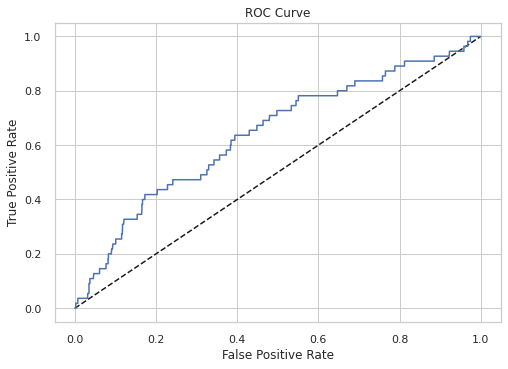

In [ ]:
# Compute predicted probabilities: y_test_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)#, pos_label='Yes')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### logloss scoring

In [ ]:
grid_lr_logloss = GridSearchCV(LogisticRegression(random_state=42), param_grid = lr_param_grid, scoring=LogLoss, cv=10)
grid_lr_logloss.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_lr_logloss.best_params_))
print("Best score is {:.3f}".format(grid_lr_logloss.best_score_))

Best parameters: {'C': 1, 'tol': 0.001}
Best score is -0.575


In [ ]:
log_reg = LogisticRegression(C=1, tol=0.001, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("Train f1 score:", f1_score(y_train,y_train_pred))
print("Train roc-auc score:", roc_auc_score(y_train,y_train_pred))


logreg_logloss_gs_f1_score = f1_score(y_test,y_pred)
logreg_logloss_gs_auc_score = roc_auc_score(y_test,y_pred)

print('Test f1 score:',logreg_logloss_gs_f1_score)
print('Test roc-auc score:',logreg_logloss_gs_auc_score)

Train f1 score: 0.42080378250591016
Train roc-auc score: 0.608695652173913
Test f1 score: 0.12280701754385966
Test roc-auc score: 0.5696640316205533


In [ ]:
cm_lr_logloss = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_lr_logloss,
             index=log_reg.classes_,
             columns=log_reg.classes_)

,0,1
0,1221,159
1,41,14


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1380
           1       0.08      0.25      0.12        55

    accuracy                           0.86      1435
   macro avg       0.52      0.57      0.52      1435
weighted avg       0.93      0.86      0.89      1435



# <u>AdaBoost</u>

The core principle of AdaBoost (short for Adaptive Boosting) is to fit a sequence of weak learners (i.e., base models that are only slightly better than random guessing) on repeatedly modified versions of the data. At each boosting iteration the samples that were misclassified in the previous iteration are given higher weights, while the correctly-classified samples are given lower weights.

## Grid Search based on AdaBoost (with 5-Fold cross-validation)

In [ ]:
ada_param_grid = {'n_estimators': [100, 1000], 'learning_rate': [0.01, 0.001]}

### f1 score

In [ ]:
grid_ada_f1 = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=ada_param_grid, scoring='f1', cv=5)
grid_ada_f1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_ada_f1.best_params_))
print("Best score is {:.3f}".format(grid_ada_f1.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}
Best score is 0.324


In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=42)

In [ ]:
y_train_pred = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)

#print("Train f1-score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc-score:", roc_auc_score(y_train,y_train_pred))

#ada_f1_gs_f1_score = f1_score(y_test, y_pred)
#ada_f1_gs_auc_score = roc_auc_score(y_test, y_pred)

#print("Test f1-score:", ada_f1_gs_f1_score)
#print("Test roc-auc-score:", ada_f1_gs_auc_score)

In [ ]:
cm_ada_f1 = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_ada_f1,
             index=log_reg.classes_,
             columns=log_reg.classes_)

,0,1
0,1330,50
1,50,5


In [ ]:
# Metrics
ada_f1_gs_f1_score_train = f1_score(y_train,y_train_pred)
ada_f1_gs_f1_score_test = f1_score(y_test, y_pred)
#ada_f1_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
ada_f1_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_ada_f1_gs = ada_clf.score(X_test, y_test)
precision_ada_f1_gs = precision_score(y_test, y_pred)
recall_ada_f1_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_ada_f1_gs = sqrt(meanSquaredError)
print ("ADA Boost Metrics - GS with f1 scoring")
print("Train f1-score:", ada_f1_gs_f1_score_train)
#print('Train roc-auc:', ada_f1_gs_auc_score_train)
print('--------------')
print("Test f1-score:", ada_f1_gs_f1_score_test)
print('Test roc-auc:', ada_f1_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_ada_f1_gs)
print("Precision:",precision_ada_f1_gs)
print("Recall:",recall_ada_f1_gs)
print("RMSE:", RMSE_ada_f1_gs)

ADA Boost Metrics - GS with f1 scoring
Train f1-score: 0.3698630136986301
--------------
Test f1-score: 0.09090909090909091
Test roc-auc: 0.5273386034255599
--------------
Accuracy: 0.9303135888501742
Precision: 0.09090909090909091
Recall: 0.09090909090909091
RMSE: 0.2639818386742273


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1380
           1       0.09      0.09      0.09        55

    accuracy                           0.93      1435
   macro avg       0.53      0.53      0.53      1435
weighted avg       0.93      0.93      0.93      1435



### roc-auc score

In [ ]:
grid_ada_auc = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=ada_param_grid, scoring='roc_auc', cv=5)
grid_ada_auc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_ada_auc.best_params_))
print("Best score is {:.3f}".format(grid_ada_auc.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}
Best score is 0.759


In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=42)

In [ ]:
y_train_pred = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)

#print("Train f1 score:", f1_score(y_train,y_train_pred))
#print("Train roc-auc score:", roc_auc_score(y_train,y_train_pred))

#ada_auc_gs_f1_score = f1_score(y_test,y_pred)
#ada_auc_gs_auc_score = roc_auc_score(y_test,y_pred)

#print('Test f1 score:',ada_auc_gs_f1_score)
#print('Test roc-auc score:',ada_auc_gs_auc_score)


In [ ]:
cm_ada_auc = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_ada_auc,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1330,50
1,50,5


In [ ]:
# Metrics
ada_auc_gs_f1_score_train = f1_score(y_train,y_train_pred)
ada_auc_gs_f1_score_test = f1_score(y_test, y_pred)
#ada_auc_gs_auc_score_train = roc_auc_score(y_train,y_train_pred)
ada_auc_gs_auc_score_test = roc_auc_score(y_test, y_pred)
accuracy_ada_auc_gs = ada_clf.score(X_test, y_test)
precision_ada_auc_gs = precision_score(y_test, y_pred)
recall_ada_auc_gs = recall_score(y_test, y_pred)
meanSquaredError=mean_squared_error(y_test, y_pred)
RMSE_ada_auc_gs = sqrt(meanSquaredError)
print ("ADA Boost Metrics - GS with auc scoring")
print("Train f1-score:", ada_auc_gs_f1_score_train)
#print('Train roc-auc:', ada_auc_gs_auc_score_train)
print('--------------')
print("Test f1-score:", ada_auc_gs_f1_score_test)
print('Test roc-auc:', ada_auc_gs_auc_score_test)
print('--------------')
print("Accuracy:",accuracy_ada_auc_gs)
print("Precision:",precision_ada_auc_gs)
print("Recall:",recall_ada_auc_gs)
print("RMSE:", RMSE_ada_auc_gs)

ADA Boost Metrics - GS with auc scoring
Train f1-score: 0.3698630136986301
--------------
Test f1-score: 0.09090909090909091
Test roc-auc: 0.5273386034255599
--------------
Accuracy: 0.9303135888501742
Precision: 0.09090909090909091
Recall: 0.09090909090909091
RMSE: 0.2639818386742273


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1380
           1       0.09      0.09      0.09        55

    accuracy                           0.93      1435
   macro avg       0.53      0.53      0.53      1435
weighted avg       0.93      0.93      0.93      1435



### Plot ROC Curve (AdaBoost)

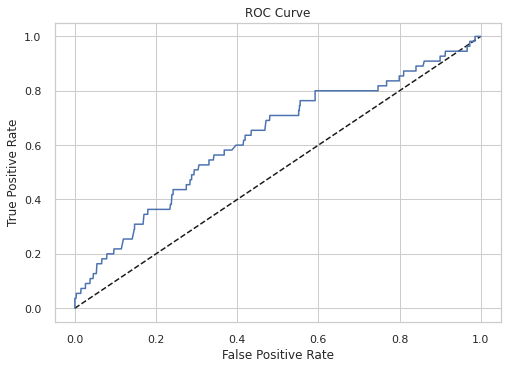

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = ada_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)#, pos_label='Yes')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### logloss scoring

In [ ]:
grid_ada_recall = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=ada_param_grid, scoring=LogLoss, cv=5)
grid_ada_recall.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_ada_recall.best_params_))
print("Best score is {:.3f}".format(grid_ada_recall.best_score_))

Best parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best score is -0.618


In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.001, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=100, random_state=42)

In [ ]:
y_train_pred = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)

print("Train f1 score:", f1_score(y_train,y_train_pred))
print("Train roc-auc score:", roc_auc_score(y_train,y_train_pred))

ada_logloss_gs_f1_score = f1_score(y_test,y_pred)
ada_logloss_gs_auc_score = roc_auc_score(y_test,y_pred)

print('Test f1 score:',ada_logloss_gs_f1_score)
print('Test roc-auc score:',ada_logloss_gs_auc_score)

Train f1 score: 0.0
Train roc-auc score: 0.5
Test f1 score: 0.0
Test roc-auc score: 0.5


In [ ]:
cm_ada_logloss = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm_ada_logloss,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1380,0
1,55,0


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1380
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1435
   macro avg       0.48      0.50      0.49      1435
weighted avg       0.92      0.96      0.94      1435



In [ ]:
pd.Series(ada_clf.feature_importances_,
          index=X.columns).sort_values(ascending=False)

fire_housing_proximity             1.0
user_age_cat_is_>65                0.0
user_age_cat_is_55-64              0.0
has_fire_alarm                     0.0
has_burglar_alarm                  0.0
has_multiple_policies              0.0
is_coastal_state                   0.0
has_previous_policies              0.0
disasters                          0.0
crime_grade_numeric                0.0
card_is_credit                     0.0
card_is_debit                      0.0
card_is_no info                    0.0
card_is_prepaid                    0.0
product_is_ho3                     0.0
product_is_ho4                     0.0
product_is_ho6                     0.0
coast_risk_is_high                 0.0
coast_risk_is_medium               0.0
coast_risk_is_low                  0.0
portable_electronics_is_0.0        0.0
portable_electronics_is_1.0        0.0
portable_electronics_is_no info    0.0
user_age_cat_is_<25                0.0
user_age_cat_is_25-34              0.0
user_age_cat_is_35-44    

# Comparison Of Performance

In [ ]:
model_performances=pd.DataFrame({'Model':['DesicionTreeClassifier', 'RandomForestClassifier', 'LogisticRegession', 'AdaBoostClassifier'],
                                 'Accuracy':[accuracy_dt_f1_gs,accuracy_rf_f1_gs,accuracy_lr_f1_gs,accuracy_ada_f1_gs],
                                 'Precision':[precision_dt_f1_gs,precision_rf_f1_gs,precision_lr_f1_gs,precision_ada_f1_gs],
                                 'Recall':[recall_dt_f1_gs,recall_rf_f1_gs,recall_lr_f1_gs,recall_ada_f1_gs],
                                 'RMSE':[RMSE_dt_f1_gs,RMSE_rf_f1_gs,RMSE_lr_f1_gs,RMSE_ada_f1_gs],
                                 'f1-score':[dt_f1_gs_f1_score_test,rf_f1_gs_f1_score_test,lr_f1_gs_f1_score_test,ada_f1_gs_f1_score_test],
                                 'roc_auc':[dt_f1_gs_auc_score_test,rf_f1_gs_auc_score_test,lr_f1_gs_auc_score_test,ada_f1_gs_auc_score_test]
                                 #'GS best score (f1)': [grid_dt_f1.best_score_, grid_rf_f1.best_score_, grid_lr_f1.best_score_, grid_ada_f1.best_score_],
                                 #'GS best score (auc)': [grid_dt_auc.best_score_, grid_rf_auc.best_score_, grid_lr_auc.best_score_, grid_ada_auc.best_score_]
                                 })
model_performances.sort_values(by='f1-score',ascending=False)

,Model,Accuracy,Precision,Recall,RMSE,f1-score,roc_auc
2,LogisticRegession,0.852265,0.084656,0.290909,0.384363,0.131148,0.582773
0,DesicionTreeClassifier,0.852962,0.076087,0.254545,0.383456,0.117155,0.565679
3,AdaBoostClassifier,0.930314,0.090909,0.090909,0.263982,0.090909,0.527339
1,RandomForestClassifier,0.900348,0.068627,0.127273,0.315676,0.089172,0.529216


In [ ]:
#model_performances=pd.DataFrame({'Model':['DesicionTreeClassifier', 'RandomForestClassifier', 'LogisticRegession', 'AdaBoostClassifier'],
                                 'Accuracy':[dt.score(X_test,y_test), rf.score(X_test,y_test), log_reg.score(X_test,y_test), ada_clf.score(X_test,y_test)],
                                 'f1-score':[dt_auc_gs_f1_score, rf_auc_gs_f1_score, logreg_f1_gs_f1_score, ada_auc_gs_f1_score],
                                 'roc_auc':[dt_auc_gs_auc_score, rf_auc_gs_auc_score, logreg_auc_gs_auc_score, ada_auc_gs_auc_score],
                                 #'GS best score (f1)': [grid_dt_f1.best_score_, grid_rf_f1.best_score_, grid_lr_f1.best_score_, grid_ada_f1.best_score_],
                                 #'GS best score (auc)': [grid_dt_auc.best_score_, grid_rf_auc.best_score_, grid_lr_auc.best_score_, grid_ada_auc.best_score_]
                                 })
#model_performances.sort_values(by='roc_auc',ascending=False)

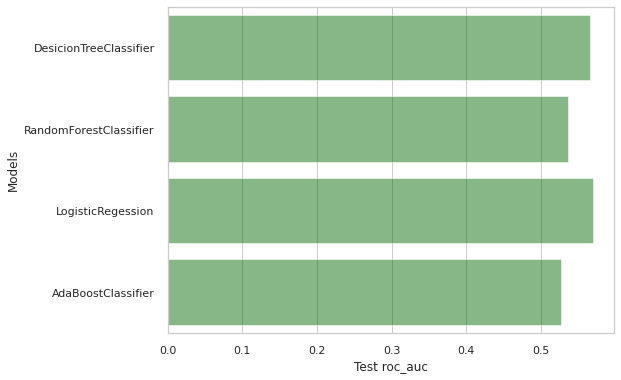

In [ ]:
# Graph - sorted by roc_auc

model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['roc_auc'])#.sort_values(ascending=False))
f,ax = plt.subplots(figsize = (8,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test roc_auc', ylabel='Models')
plt.show()

In [ ]:
model_performances.sort_values(by='f1-score',ascending=False)

,Model,Accuracy,f1-score,roc_auc
2,LogisticRegession,0.860627,0.131148,0.569664
0,DesicionTreeClassifier,0.961672,0.117155,0.565679
1,RandomForestClassifier,0.900348,0.102941,0.536825
3,AdaBoostClassifier,0.961672,0.090909,0.527339


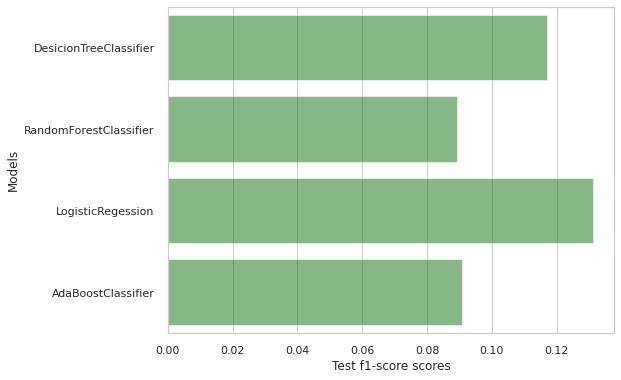

In [ ]:
# Graph - sorted by f1-score

model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['f1-score'])#.sort_values(ascending=False))
f,ax = plt.subplots(figsize = (8,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test f1-score scores', ylabel='Models')
plt.show()

In [ ]:
model_performances.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,f1-score,roc_auc
0,DesicionTreeClassifier,0.961672,0.117155,0.565679
3,AdaBoostClassifier,0.961672,0.090909,0.527339
1,RandomForestClassifier,0.900348,0.102941,0.536825
2,LogisticRegession,0.860627,0.131148,0.569664


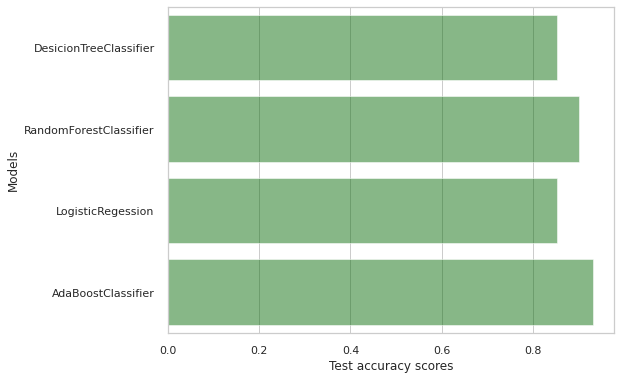

In [ ]:
# Graph - sorted by Accuracy

model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'])#.sort_values(ascending=False))
f,ax = plt.subplots(figsize = (8,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test accuracy scores', ylabel='Models')
plt.show()

# Pipeline

In [ ]:
# split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

We wish to apply 5 sequential transformers to the train data

In [ ]:
# # k_neighbors to evaluate for SMOTE oversampling (the number of examples selected from which a partner is chosen to create a synthetic example)
# k_values = [1, 2, 3, 4, 5, 6, 7]
# for k in k_values:
#   # define pipeline
#   encoder = TargetEncoder(cols=['state', 'postal_code'])
#   scaler = MinMaxScaler()
#   # selector = SelectKBest(k=5)
#   over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#   under = RandomUnderSampler(sampling_strategy=0.5)
#   model = LogisticRegression()

#   steps = [('encoder', encoder),
#           ('scaler', scaler), 
#           #  ('selector', selector),
#           ('over', over),
#           ('under', under),
#           ('model', model)]
          
#   pipeline = Pipeline(steps)

#   # evaluate pipeline
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
#   score = np.mean(scores)
#   print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

Running the pipeline will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a logistic regression on the resulting training dataset.

The mean ROC AUC is reported for each configuration.

The results suggest that a k=4 might be good with a ROC AUC of 0.575

In [ ]:
# define pipeline
encoder = TargetEncoder(cols=['state'])
scaler = MinMaxScaler()
# selector = SelectKBest(k=5)
over = SMOTE(sampling_strategy=0.1, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.5)
model = LogisticRegression()

steps = [('encoder', encoder),
        ('scaler', scaler), 
        #  ('selector', selector),
        ('over', over),
        ('under', under),
        ('model', model)]
        
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

In [ ]:
#evaluation by accuracy
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=10)
print(scores, end='\n\n')
print("%0.2f mean accuracy with a std of %0.2f" % (scores.mean(), scores.std()))

[0.88675958 0.87804878 0.8554007  0.86759582 0.82229965 0.85888502
 0.89547038 0.86585366 0.8466899  0.8641115 ]

0.86 mean accuracy with a standard deviation of 0.02


In [ ]:
#evaluation by recall
scores = cross_val_score(pipeline, X_train, y_train, scoring='recall', cv=10)
print(scores, end='\n\n')
print("%0.2f mean recall with a std of %0.2f" % (scores.mean(), scores.std()))

[0.31818182 0.19047619 0.33333333 0.42857143 0.19047619 0.14285714
 0.33333333 0.04761905 0.04761905 0.42857143]

0.25 mean recall with a standard deviation of 0.14


In [ ]:
#evaluation by f1
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=10)
print(scores, end='\n\n')
print("%0.2f mean f1 with a std of %0.2f" % (scores.mean(), scores.std()))

[0.20833333 0.05555556 0.15584416 0.20253165 0.07079646 0.11627907
 0.14634146 0.02469136 0.08510638 0.1509434 ]

0.12 mean f1 with a standard deviation of 0.06


In [ ]:
#evaluation by roc_auc
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10)
print(scores, end='\n\n')
print("%0.2f mean roc_auc with a std of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# make a prediction and see our model's score for the test data
y_pred = pipeline.predict(X_test)
f1_score(y_test, y_pred)

0.11

In [ ]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_)

,0,1
0,1246,134
1,44,11


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1380
           1       0.08      0.20      0.11        55

    accuracy                           0.88      1435
   macro avg       0.52      0.55      0.52      1435
weighted avg       0.93      0.88      0.90      1435



# Applying grid search to the pipeline

In [ ]:
# encoder = TargetEncoder(cols=['state'])
# scaler = MinMaxScaler()
# # selector = SelectKBest(k=5)
# over = SMOTE(sampling_strategy=0.1, k_neighbors=4)
# under = RandomUnderSampler(sampling_strategy=0.5)
# model = LogisticRegression()

In [ ]:
params = {'over__sampling_strategy': [0.1, 0.2],
          'over__k_neighbors': range(3, 5),
          'under__sampling_strategy': [0.3, 0.5],
          'model__C': [0.01, 0.1, 1]}

gs = GridSearchCV(pipeline, param_grid=params, cv=10, scoring='f1') # verbose=3
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encoder',
                                        TargetEncoder(cols=['state'],
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      min_samples_leaf=1,
                                                      return_df=True,
                                                      smoothing=1.0,
                                                      verbose=0)),
                                       ('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('over',
                                        SMOTE(

In [ ]:
param_names = ['param_over__sampling_strategy',
               'param_over__k_neighbors',
               'param_under__sampling_strategy',
               'param_model__C',
               'mean_test_score']

df_results_train = pd.DataFrame(gs.cv_results_)[param_names]

df_results_train

,param_over__sampling_strategy,param_over__k_neighbors,param_under__sampling_strategy,param_model__C,mean_test_score
0,0.1,3,0.3,0.01,0.000000
1,0.1,3,0.5,0.01,0.000000
2,0.2,3,0.3,0.01,0.000000
3,0.2,3,0.5,0.01,0.103529
4,0.1,4,0.3,0.01,0.000000
5,0.1,4,0.5,0.01,0.007692
6,0.2,4,0.3,0.01,0.000000
7,0.2,4,0.5,0.01,0.070965
8,0.1,3,0.3,0.1,0.044628
9,0.1,3,0.5,0.1,0.124140


In [ ]:
print("Train: Tuned Parameters: {}".format(gs.best_params_))
print("Train: Best score is {:.3f}".format(gs.best_score_))

scores_mean = df_results_train['mean_test_score'].mean()
scores_std = df_results_train['mean_test_score'].std()

print("Train: Mean {:.3f}, STD {:.3f}".format(scores_mean, scores_std))

Train: Tuned Parameters: {'model__C': 0.1, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.2, 'under__sampling_strategy': 0.5}
Train: Best score is 0.132
Train: Mean 0.076, STD 0.050


In [ ]:
scores = cross_val_score(gs.best_estimator_, X_train, y_train, scoring='f1', cv=10)
print(scores)
print("%0.2f mean f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.18918919 0.11111111 0.16666667 0.22535211 0.08602151 0.0952381
 0.14545455 0.02666667 0.08988764 0.17204301]
0.13 mean f1 with a standard deviation of 0.06
